<div style="nosxt-align:cennosr; font-size:26px; color:green;">(III) Bogleheads en acción: Bogleheads versus Planes Pensión.</div>

Si no compartimos el conocimiento no sirve para nada. [Michio Kaku](https://www.younuestrobe.com/watch?v=6rDxlolYUQw)

**Descarga de cotizaciones.**  
Para obtener datos históricos de precios, puedes:

Descargarlos directamente desde las gestoras de los fondos.
Utilizar plataformas públicas como Yahoo Finance mediante la librería yfinance.
yfinance es una herramienta popular en análisis financiero que facilita el acceso a datos históricos considerados de dominio público. Sin embargo, estos datos pueden presentar pequeñas diferencias con respecto a las fuentes oficiales. Por ello, para decisiones críticas, siempre se recomienda contrastar la información con la documentación oficial de la gestora.

⚠️ **Precauciones.**
Este proyecto utiliza yfinance (con licencia bajo la [Apache License 2.0](https://www.apache.org/licenses/LICENSE-2.0).
), una interfaz para descargar datos financieros desde Yahoo Finance. Ten en cuenta lo siguiente:

Los datos descargados son exclusivamente para uso personal.
No está permitido redistribuirlos o venderlos.
Su uso en contextos educativos o sin ánimo de lucro suele ser aceptable, siempre que se cumplan estas condiciones.
Evita realizar peticiones excesivas o abusivas que puedan violar los términos de uso del servicio.


# Monta tu Google Drive en Colaboratory.

In [ ]:
# Monta tu Drive para que Colab acceda a los archivos
from google.colab import drive
drive.mount('/content/drive')

!pip install yfinance

Mounted at /content/drive


# Descargar cotizaciones desde Yahoo Finances.

Tenemos dos opciones: descargar desde las **Gestoras de los Fondos** o también desde **Yahoo Finance.**
**yfinance** es una librería ampliamente utilizada y respetada para análisis financiero. Los datos históricos de precios son generalmente considerados información pública.
Vanguard publica esta información públicamente a través de Yahoo Finance. Los datos de yfinance, Los datos pueden tener ligeras diferencias con las fuentes oficiales de Vanguard por lo que, para decisiones importante sugerimos verificar con fuentes oficiales.

**Precaución**  
Para el desarrollo de este proyecto, se ha empleado la biblioteca **yfinance:** Esta biblioteca de Python, licenciada bajo la Apache License 2.0, proporciona una interfaz para acceder y descargar datos financieros directamente de Yahoo. Finanzas. Es importante entender que los datos descargados de esta web son para uso personal, prohibiéndose su redistribución o venta. En el contexto de un uso sin ánimo de lucro, se considera generalmente aceptable siempre que se respeten estas directrices y se eviten peticiones de datos excesivas o abusivas.


In [ ]:
import os
import pandas as pd
import yfinance as yf

class VanguardManager:
    """
    Clase para gestionar la descarga de datos de fondos de inversión de Vanguard
    usando la librería yfinance.
    """
    def __init__(self, data_directory):
        self.data_directory = data_directory
        os.makedirs(data_directory, exist_ok=True)
        self.fondos_data = {
            'Renta variable': {
                'Vanguard Global Stock Index Fund EUR Acc': {'ISIN': 'IE00B03HD191', 'ticker': '0P00000WLG.F'},
                'Vanguard Global Small-Cap Index Fund EUR Acc': {'ISIN': 'IE00B42W4L06', 'ticker': '0P0000XR9M.F'},
                'Vanguard Global Small-Cap Index Fund EUR Dist': {'ISIN': 'IE00BDCXSH02', 'ticker': '0P0001CXIY.F'},
                'Vanguard Emerging Markets Stock Index Fund EUR Acc': {'ISIN': 'IE0031786142', 'ticker': '0P000060MS.F'}
            },
            'Renta fija': {
                'Vanguard Global Bond Index Fund EUR Hedged Acc': {'ISIN': 'IE00B18GC888', 'ticker': '0P00012I69.F'},
                'Vanguard Global Short-Term Bond Index Fund EUR Hedged Acc': {'ISIN': 'IE00BH65QP47', 'ticker': '0P00012NJH.F'},
                'DWS Euro Ultra Short Fixed': {'ISIN': 'LU0080237943', 'ticker': 'DI4C.F'}
            },
            'Fondos monetarios': {
                'Groupama Trèsorerie': {'ISIN': 'FR0000989626', 'ticker': '0P00000LRT.F'},
                'La Française Trésorerie': {'ISIN': 'FR0000991390', 'ticker': '0P00002BDB.F'},
                'AXA Tresorerié': {'ISIN': 'FR0000447823', 'ticker': '0P00000F24.F'}
            },
            'Fondos ultra corto plazo': {
                'DWS Euro Ultra Short Fixed': {'ISIN': 'LU0080237943', 'ticker': 'DI4C.F'},
                'Groupama Ultra Short Term Bond': {'ISIN': 'FR0013346079', 'ticker': '0P0001FSY0.F'},
                'OstrumSRI Credit Ultra Short': {'ISIN': 'FR001400CFA4', 'ticker': '0P0001QKUD.F'},
                'Amundi Ultra Short Term Bond': {'ISIN': 'FR0011365212', 'ticker':'0P0000XPCY.F'},
                'Invesco Euro Ultra Short': {'ISIN': 'LU0102737730', 'ticker':'IUGF.F'}
            },
            'Indices': {
                'MSCI world': {'ISIN': 'MSCI_world', 'ticker':'VWCE.DE'}
            }
        }
        self.dataframes = {}
    def download_fund_data(self, fund_name, fund_info):
        """
        Descarga los datos históricos para un fondo específico.
        """
        ticker = fund_info['ticker']
        isin = fund_info['ISIN']
        print(f'Descargando datos de {fund_name} ({ticker})...')

        try:
            # Descargar los datos, incluyendo 'auto_adjust' para obtener precios ajustados
            df = yf.download(ticker, period='max', auto_adjust=True)

            # Verificar si el DataFrame tiene un MultiIndex en las columnas y corregirlo
            if isinstance(df.columns, pd.MultiIndex):
                df.columns = df.columns.droplevel(1)

            # Asegurarse de que el DataFrame no esté vacío antes de continuar
            if df.empty:
                print(f'Advertencia: No hay datos disponibles para {fund_name} ({ticker}).')
                self.dataframes[isin] = pd.DataFrame()
            else:
                # Seleccionar únicamente la columna 'Close'
                df = df[['Close']]

                # Guardar el DataFrame en un archivo CSV
                csv_path = os.path.join(self.data_directory, f'{isin}.csv')
                df.to_csv(csv_path)
                print(f'Guardado en {csv_path}')

                # Almacenar el DataFrame en el diccionario de la clase
                self.dataframes[isin] = df

        except Exception as e:
            print(f'Error al descargar los datos de {fund_name} ({ticker}): {e}')
            self.dataframes[isin] = pd.DataFrame() # Guarda un DataFrame vacío en caso de error

    def download_all(self):
        """
        Itera sobre todos los fondos definidos y descarga sus datos.
        """
        for categoria, fondos in self.fondos_data.items():
            print(f'\n--- Categoría: {categoria} ---')
            for fund_name, fund_info in fondos.items():
                self.download_fund_data(fund_name, fund_info)

# --- Ejemplo de uso ---

if __name__ == '__main__':
    # Define la ruta del directorio
    data_directory = './Datos/Ficheros_bogleheads'

    # Crea una instancia de la clase
    manager = VanguardManager(data_directory)

    # Llama al método para descargar todos los datos
    manager.download_all()

    # Ahora, el diccionario 'dataframes' estará lleno
    #print('\nContenido del diccionario de DataFrames:')
    #print(manager.dataframes)


--- Categoría: Renta variable ---
Descargando datos de Vanguard Global Stock Index Fund EUR Acc (0P00000WLG.F)...


[*********************100%***********************]  1 of 1 completed


Guardado en ./Datos/Ficheros_bogleheads/IE00B03HD191.csv
Descargando datos de Vanguard Global Small-Cap Index Fund EUR Acc (0P0000XR9M.F)...


[*********************100%***********************]  1 of 1 completed


Guardado en ./Datos/Ficheros_bogleheads/IE00B42W4L06.csv
Descargando datos de Vanguard Global Small-Cap Index Fund EUR Dist (0P0001CXIY.F)...


[*********************100%***********************]  1 of 1 completed


Guardado en ./Datos/Ficheros_bogleheads/IE00BDCXSH02.csv
Descargando datos de Vanguard Emerging Markets Stock Index Fund EUR Acc (0P000060MS.F)...


[*********************100%***********************]  1 of 1 completed


Guardado en ./Datos/Ficheros_bogleheads/IE0031786142.csv

--- Categoría: Renta fija ---
Descargando datos de Vanguard Global Bond Index Fund EUR Hedged Acc (0P00012I69.F)...


[*********************100%***********************]  1 of 1 completed


Guardado en ./Datos/Ficheros_bogleheads/IE00B18GC888.csv
Descargando datos de Vanguard Global Short-Term Bond Index Fund EUR Hedged Acc (0P00012NJH.F)...


[*********************100%***********************]  1 of 1 completed


Guardado en ./Datos/Ficheros_bogleheads/IE00BH65QP47.csv
Descargando datos de DWS Euro Ultra Short Fixed (DI4C.F)...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['DI4C.F']: YFInvalidPeriodError("DI4C.F: Period 'max' is invalid, must be one of: 1d, 5d")


Advertencia: No hay datos disponibles para DWS Euro Ultra Short Fixed (DI4C.F).

--- Categoría: Fondos monetarios ---
Descargando datos de Groupama Trèsorerie (0P00000LRT.F)...


[*********************100%***********************]  1 of 1 completed


Guardado en ./Datos/Ficheros_bogleheads/FR0000989626.csv
Descargando datos de La Française Trésorerie (0P00002BDB.F)...


[*********************100%***********************]  1 of 1 completed


Guardado en ./Datos/Ficheros_bogleheads/FR0000991390.csv
Descargando datos de AXA Tresorerié (0P00000F24.F)...


[*********************100%***********************]  1 of 1 completed


Guardado en ./Datos/Ficheros_bogleheads/FR0000447823.csv

--- Categoría: Fondos ultra corto plazo ---
Descargando datos de DWS Euro Ultra Short Fixed (DI4C.F)...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['DI4C.F']: YFInvalidPeriodError("DI4C.F: Period 'max' is invalid, must be one of: 1d, 5d")


Advertencia: No hay datos disponibles para DWS Euro Ultra Short Fixed (DI4C.F).
Descargando datos de Groupama Ultra Short Term Bond (0P0001FSY0.F)...


[*********************100%***********************]  1 of 1 completed


Guardado en ./Datos/Ficheros_bogleheads/FR0013346079.csv
Descargando datos de OstrumSRI Credit Ultra Short (0P0001QKUD.F)...


[*********************100%***********************]  1 of 1 completed


Guardado en ./Datos/Ficheros_bogleheads/FR001400CFA4.csv
Descargando datos de Amundi Ultra Short Term Bond (0P0000XPCY.F)...


[*********************100%***********************]  1 of 1 completed


Guardado en ./Datos/Ficheros_bogleheads/FR0011365212.csv
Descargando datos de Invesco Euro Ultra Short (IUGF.F)...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['IUGF.F']: YFInvalidPeriodError("IUGF.F: Period 'max' is invalid, must be one of: 1d, 5d")


Advertencia: No hay datos disponibles para Invesco Euro Ultra Short (IUGF.F).

--- Categoría: Indices ---
Descargando datos de MSCI world (VWCE.DE)...


[*********************100%***********************]  1 of 1 completed

Guardado en ./Datos/Ficheros_bogleheads/MSCI_world.csv


# Crear DataFrames para la estrategia.
Importa cotizaciones de los ficheros CSV que seleccionemos.
Desde Yahoo Finance se descargan cotizaciones históricas desde el 2018-01-02.
Para estas simulaciones seleccionamos el rango de fechas 2018-01-02 a 2025-09-04, utilizando datos históricos descargados de las gestoras.

Para las simulaciones que vamos a realizar comformamos carteras con cotizaciones de los fondos siguientes.  

Renta variable.  

- Vanguard Global Stock Index Fund EUR Acc (IE00B03HD191).  Ticker en Yahoo Finances (0P00000WLG.F)
- Vanguard Global Small-Cap Index Fund EUR Acc (IE00B42W4L06).  Ticker en Yahoo Finances (0P0000XR9M.F)
- Vanguard Global Small-Cap Index Fund EUR Dist (IE00BDCXSH02). Ticker en Yahoo Finances (0P0001CXIY.F)
- Vanguard Emerging Markets Stock Index Fund EUR Acc (IE0031786142).  Ticker en Yahoo Finances (0P000060MS.F)

Renta fija.  

- Vanguard Global Bond Index Fund EUR Hedged Acc (IE00B18GC888). Ticker en Yahoo Finances (0P00012I69.F)    
- Vanguard Global Short-Term Bond Index Fund EUR Hedged Acc (IE00BH65QP47).  Ticker en Yahoo Finances  (0P00012NJH.F)
- DWS Euro Ultra Short Fixed (LU0080237943).  Ticker en Yahoo Finances (DI4C.F)
- Vanguard Global Short-Term Bond Index Fund EUR Hedged Acc (IE00BH65QP47). Ticker en Yahoo Finances(0P00012NJH.F)

In [ ]:
import pandas as pd
import os
import csv

from typing import List
from datetime import datetime

class GestorImportaciones:
    def __init__(self, ruta_base):
        self.ruta_base = ruta_base
        self.dataframes = {}
        self.nombres_importados = []
        self.df_dict = {}
        self.fecha_inicio = None
        self.fecha_fin = None

    def solicitar_rango_fechas(self):
        """Solicita al usuario un rango de fechas para filtrar los datos"""
        print("\n📅 Selección de rango de fechas")
        print("💡 Formato recomendado: YYYY-MM-DD (ej: 2023-01-01)")

        while True:
            fecha_inicio_str = input("👉 Fecha de inicio (ENTER para todas las fechas): ").strip()
            if not fecha_inicio_str:
                self.fecha_inicio = None
                break
            try:
                self.fecha_inicio = pd.to_datetime(fecha_inicio_str)
                break
            except:
                print("❌ Formato de fecha no válido. Intenta de nuevo.")

        while True:
            if self.fecha_inicio is not None:
                fecha_fin_str = input("👉 Fecha de fin (ENTER para fecha actual): ").strip()
                if not fecha_fin_str:
                    self.fecha_fin = pd.to_datetime('today')
                    break
            else:
                fecha_fin_str = input("👉 Fecha de fin (solo si especificaste fecha inicio): ").strip()
                if not fecha_fin_str:
                    self.fecha_fin = None
                    break

            try:
                self.fecha_fin = pd.to_datetime(fecha_fin_str)
                if self.fecha_inicio and self.fecha_fin < self.fecha_inicio:
                    print("❌ La fecha fin no puede ser anterior a la fecha inicio.")
                    continue
                break
            except:
                print("❌ Formato de fecha no válido. Intenta de nuevo.")

        print(f"✅ Rango seleccionado: {self.fecha_inicio} - {self.fecha_fin}")

    def filtrar_por_fechas(self, df):
        """Filtra el DataFrame según el rango de fechas seleccionado"""
        if self.fecha_inicio is not None and self.fecha_fin is not None:
            mask = (df.index >= self.fecha_inicio) & (df.index <= self.fecha_fin)
            df_filtrado = df.loc[mask]
            print(f"📊 Datos filtrados: {len(df_filtrado)} de {len(df)} observaciones")
            return df_filtrado
        elif self.fecha_inicio is not None:
            df_filtrado = df[df.index >= self.fecha_inicio]
            print(f"📊 Datos filtrados: {len(df_filtrado)} de {len(df)} observaciones")
            return df_filtrado
        else:
            print("📊 Importando todos los datos disponibles")
            return df

    def listar_subcarpetas(self):
        carpetas = [nombre for nombre in os.listdir(self.ruta_base)
                    if os.path.isdir(os.path.join(self.ruta_base, nombre))]
        print("\n📁 Carpetas disponibles:")
        for i, carpeta in enumerate(carpetas):
            print(f"[{i}] {carpeta}")
        return carpetas

    def seleccionar_carpeta(self, carpetas):
        idx_str = input("\n👉 Selecciona el número de carpeta: ")
        idx = int(idx_str)
        return os.path.join(self.ruta_base, carpetas[idx])

    def listar_csv(self, carpeta_path):
        archivos = [nombre for nombre in os.listdir(carpeta_path)
                    if nombre.endswith(".csv")]
        if not archivos:
            return []
        print("\n📄 CSV disponibles:")
        for i, archivo in enumerate(archivos):
            print(f"[{i}] {archivo}")
        return archivos

    def seleccionar_archivo(self, archivos):
        idx_str = input("\n👉 Selecciona el número de archivo: ")
        idx = int(idx_str)
        return archivos[idx]

    def importar_csv(self, carpeta_path, archivo):
        ruta = os.path.join(carpeta_path, archivo)

        try:
            with open(ruta, 'r', encoding='utf-8') as f:
                muestra = f.read(2048)
                dialecto = csv.Sniffer().sniff(muestra)
                sep_detectado = dialecto.delimiter
                dec_detectado = ',' if sep_detectado != ',' and ',' in muestra else '.'
            print(f"\n🧪 Separador detectado: '{sep_detectado}' | Decimal: '{dec_detectado}'")
        except Exception as e:
            print(f"\n⚠️ No se pudo detectar automáticamente: {e}")
            sep_detectado = input("🧪 Separador (default ','): ") or ','
            dec_detectado = input("🧪 Decimal (default '.'): ") or '.'
            print(f"\n🧪 Usando valores manuales: Separador: '{sep_detectado}' | Decimal: '{dec_detectado}'")

        try:
            df = pd.read_csv(ruta, sep=sep_detectado, decimal=dec_detectado, encoding='utf-8')
        except UnicodeDecodeError:
            print("❌ Error de codificación con UTF-8. Intentando con 'latin-1'...")
            df = pd.read_csv(ruta, sep=sep_detectado, decimal=dec_detectado, encoding='latin-1')

        # Limpiar espacios de los nombres de las columnas
        df.columns = df.columns.str.strip()
        df.dropna(how='all', inplace=True)

        if 'Date' in df.columns:
            df['Date'] = pd.to_datetime(df['Date'], format='mixed', dayfirst=True, errors='coerce')
            df.dropna(subset=['Date'], inplace=True)
            df.set_index('Date', inplace=True)
            print("✅ Conversión de fecha exitosa.")

            # Aplicar filtro de fechas
            df = self.filtrar_por_fechas(df)

        else:
            print("⚠️ Advertencia: No se encontró la columna 'Date' para convertir a índice de fecha.")
            return None, None

        nombre_df = os.path.splitext(archivo)[0]
        nombre_df = nombre_df.replace(" ", "_").replace("-", "_").replace(".", "").replace("&", "and")

        self.dataframes[nombre_df] = df

        print(f"✅ DataFrame '{nombre_df}' cargado con shape {df.shape}")

        return nombre_df, df

    def importar_multiples_csv(self):
        # Solicitar rango de fechas primero
        self.solicitar_rango_fechas()

        self.nombres_importados = []
        contador = 1
        continuar = 's'

        while continuar == 's':
            print(f"\n📁 Selección {contador}")
            carpetas = self.listar_subcarpetas()
            if not carpetas:
                print("No hay carpetas. Terminando el proceso.")
                break

            try:
                carpeta_path = self.seleccionar_carpeta(carpetas)
            except (ValueError, IndexError):
                print("❌ Selección no válida. Inténtalo de nuevo.")
                continue

            archivos = self.listar_csv(carpeta_path)
            if not archivos:
                print("⚠️ No hay archivos CSV en esta carpeta. Saltando...")
                continue

            try:
                archivo = self.seleccionar_archivo(archivos)
            except (ValueError, IndexError):
                print("❌ Selección no válida. Inténtalo de nuevo.")
                continue

            nombre_df, df = self.importar_csv(carpeta_path, archivo)
            if nombre_df:
                self.nombres_importados.append(nombre_df)

            continuar = input("\n🧭 ¿Deseas importar otro archivo? (s/n): ").strip().lower()
            while continuar not in ['s', 'n']:
                continuar = input("❓ Respuesta no válida. Escribe 's' o 'n': ").strip().lower()

            contador += 1

        self._actualizar_df_dict()

        print("\n📊 DataFrames importados:")
        for nombre in self.nombres_importados:
            try:
                shape = self.dataframes[nombre].shape
                print(f"🔹 '{nombre}' → shape: {shape}")
            except KeyError:
                print(f"🔹 '{nombre}' no pudo ser cargado.")

        print("\n✅ Proceso finalizado.")
        return self.dataframes

    def _actualizar_df_dict(self):
        self.df_dict = {k: v.copy() for k, v in self.dataframes.items()}

    def crear_dataframes_globales(self):
        nombres_dfs_global = []
        for key, value in self.dataframes.items():
            nombre_df = f'df_{key}'
            globals()[nombre_df] = value.copy()
            nombres_dfs_global.append(nombre_df)

        print("\n✅ DataFrames globales creados:")
        print(nombres_dfs_global)
        return nombres_dfs_global

    def mostrar_resumen(self):
        if not self.nombres_importados:
            print("⚠️ No hay DataFrames importados.")
            return

        print(f"\n📊 Resumen de {len(self.nombres_importados)} DataFrames importados:")
        for i, nombre in enumerate(self.nombres_importados):
            df = self.dataframes.get(nombre)
            if df is not None:
                print(f"{i+1}. '{nombre}' → shape: {df.shape} | Índice: {type(df.index).__name__}")

        if self.nombres_importados:
            primer_df_nombre = self.nombres_importados[0]
            primer_df = self.dataframes.get(primer_df_nombre)
            if primer_df is not None:
                print(f"\n🔍 Ejemplo - DataFrame '{primer_df_nombre}' (primeras 5 filas):")
                print(primer_df.head())

    def acceder_dataframe(self, nombre):
        if nombre in self.dataframes:
            return self.dataframes[nombre]
        elif f"df_{nombre}" in self.df_dict:
            return self.df_dict[f"df_{nombre}"]
        else:
            print(f"⚠️ DataFrame '{nombre}' no encontrado.")
            print(f"📋 DataFrames disponibles: {list(self.dataframes.keys())}")
            return None

    def obtener_activos_disponibles(self) -> List[str]:
        return list(self.df_dict.keys())

    def obtener_resumen(self) -> pd.DataFrame:
        resumen_list = []
        for asset, df in self.df_dict.items():
            if not df.empty:
                info = {
                    'Activo': asset,
                    'Observaciones': len(df),
                    'Fecha_Inicio': df.index.min(),
                    'Fecha_Fin': df.index.max(),
                    'Columnas': ', '.join(df.columns)
                }
                resumen_list.append(info)
            else:
                resumen_list.append({'Activo': asset, 'Observaciones': 0, 'Fecha_Inicio': None, 'Fecha_Fin': None, 'Columnas': ''})

        return pd.DataFrame(resumen_list).set_index('Activo')



In [ ]:
# --- Ejemplo de Uso ---
if __name__ == '__main__':
    print("🚀 Iniciando proceso de importación de datos...")
    RUTA_BASE_DATOS = './Datos'
    #RUTA_BASE_DATOS = os.path.abspath('./Estrategia_bogleheads/Datos')

    gestor = GestorImportaciones(RUTA_BASE_DATOS)
    gestor.importar_multiples_csv()

🚀 Iniciando proceso de importación de datos...

📅 Selección de rango de fechas
💡 Formato recomendado: YYYY-MM-DD (ej: 2023-01-01)
👉 Fecha de inicio (ENTER para todas las fechas): 
👉 Fecha de fin (solo si especificaste fecha inicio): 
✅ Rango seleccionado: None - None

📁 Selección 1

📁 Carpetas disponibles:
[0] Ficheros_bogleheads

👉 Selecciona el número de carpeta: 0

📄 CSV disponibles:
[0] FR001400CFA4.csv
[1] IE00B42W4L06.csv
[2] IE00B18GC888.csv
[3] FR0011365212.csv
[4] IE00B03HD191.csv
[5] FR0000991390.csv
[6] IE00BH65QP47.csv
[7] FR0013346079.csv
[8] IE0031786142.csv
[9] FR0000447823.csv
[10] MSCI_world.csv
[11] FR0000989626.csv
[12] IE00BDCXSH02.csv

👉 Selecciona el número de archivo: 4

🧪 Separador detectado: ',' | Decimal: '.'
✅ Conversión de fecha exitosa.
📊 Importando todos los datos disponibles
✅ DataFrame 'IE00B03HD191' cargado con shape (1952, 1)

🧭 ¿Deseas importar otro archivo? (s/n): s

📁 Selección 2

📁 Carpetas disponibles:
[0] Ficheros_bogleheads

👉 Selecciona el núme

# Correlación entre CSV's e índice MSCI world.

In [ ]:
import pandas as pd
import os
import numpy as np
from datetime import datetime

class Import_all_csv:
    def __init__(self):
        # Mantenemos esto si quieres que los DataFrames también sean accesibles por nombre
        # como atributo de la instancia.
        self.dataframes_dict_by_name = {}

    def _leer_csv_flexible(self, ruta_archivo):
        """
        Intenta leer un archivo CSV con diferentes configuraciones para detectar el formato.
        Asume que siempre habrá una columna de fecha y una de valor (precio/cierre).
        El objetivo es estandarizar el DataFrame a un formato con 'Date' como índice y 'Close' como columna de valor.
        """
        # --- CÓDIGO DE _leer_csv_flexible COMPLETO (sin cambios respecto a la versión anterior) ---
        configs = [
            {'sep': ',', 'decimal': '.', 'header': 0, 'date_col_name': 'Date', 'value_col_name': 'Close', 'date_format': '%Y-%m-%d'},
            {'sep': ';', 'decimal': ',', 'header': 0, 'date_col_name': 'Date', 'value_col_name': 'Close', 'date_format': '%Y-%m-%d'},
            {'sep': ',', 'decimal': ',', 'header': 0, 'date_col_name': 'Date', 'value_col_name': 'Close', 'date_format': '%Y-%m-%d'},

            {'sep': ';', 'decimal': ',', 'header': None, 'date_col_idx': 0, 'value_col_idx': 1, 'date_format': '%d/%m/%Y'},
            {'sep': ',', 'decimal': ',', 'header': None, 'date_col_idx': 0, 'value_col_idx': 1, 'date_format': '%d/%m/%Y'},
            {'sep': ';', 'decimal': '.', 'header': None, 'date_col_idx': 0, 'value_col_idx': 1, 'date_format': '%d/%m/%Y'},
            {'sep': ',', 'decimal': '.', 'header': None, 'date_col_idx': 0, 'value_col_idx': 1, 'date_format': '%d/%m/%Y'},

            {'sep': ';', 'decimal': ',', 'header': None, 'date_col_idx': 0, 'value_col_idx': 1, 'date_format': '%d-%m-%Y'},
            {'sep': ',', 'decimal': ',', 'header': None, 'date_col_idx': 0, 'value_col_idx': 1, 'date_format': '%d-%m-%Y'},
            {'sep': ';', 'decimal': '.', 'header': None, 'date_col_idx': 0, 'value_col_idx': 1, 'date_format': '%d-%m-%Y'},
            {'sep': ',', 'decimal': '.', 'header': None, 'date_col_idx': 0, 'value_col_idx': 1, 'date_format': '%d-%m-%Y'},
        ]

        for config in configs:
            try:
                temp_df = pd.read_csv(ruta_archivo, sep=config['sep'], decimal=config['decimal'],
                                      header=config['header'], parse_dates=False)

                if config['header'] == 0:
                    date_col = config.get('date_col_name')
                    value_col = config.get('value_col_name')

                    if date_col in temp_df.columns and value_col in temp_df.columns:
                        df_processed = temp_df[[date_col, value_col]].copy()
                        df_processed.columns = ['Date', 'Close']
                        df_processed['Date'] = pd.to_datetime(df_processed['Date'], format=config['date_format'], errors='coerce')
                        df_processed = df_processed.dropna(subset=['Date'])
                        df_processed['Close'] = pd.to_numeric(df_processed['Close'], errors='coerce')
                        df_processed = df_processed.dropna(subset=['Close'])
                        if not df_processed.empty:
                            return df_processed.set_index('Date').sort_index()

                elif config['header'] is None:
                    date_idx = config.get('date_col_idx')
                    value_idx = config.get('value_col_idx')

                    if temp_df.shape[1] > max(date_idx, value_idx):
                        df_processed = temp_df.iloc[:, [date_idx, value_idx]].copy()
                        df_processed.columns = ['Date', 'Close']
                        df_processed['Date'] = pd.to_datetime(df_processed['Date'], format=config['date_format'], errors='coerce')
                        df_processed = df_processed.dropna(subset=['Date'])
                        df_processed['Close'] = pd.to_numeric(df_processed['Close'], errors='coerce')
                        df_processed = df_processed.dropna(subset=['Close'])
                        if not df_processed.empty:
                            return df_processed.set_index('Date').sort_index()

            except Exception as e:
                continue
        return None
        # --- FIN CÓDIGO DE _leer_csv_flexible COMPLETO ---


    def importar_csv_desde_carpeta(self, ruta_base, carpeta_a_seleccionar=None, verbose=True):
        """
        Permite al usuario (o selecciona automáticamente) una subcarpeta dentro de la ruta base
        y luego importa todos los archivos CSV de esa subcarpeta.

        Args:
            ruta_base (str): La ruta del directorio base que contiene las subcarpetas.
            carpeta_a_seleccionar (str, opcional): Si se proporciona, intenta seleccionar
                                                    esta carpeta directamente. Si es None,
                                                    se selecciona la primera subcarpeta encontrada.
            verbose (bool): Si es True, imprime mensajes de progreso y éxito/error para cada archivo.
                            Si es False, la función es "silenciosa" en su ejecución.

        Returns:
            tuple: Una tupla que contiene dos listas:
                   - list: Lista de los DataFrames (objetos pd.DataFrame) importados.
                   - list: Lista de los nombres base de los archivos CSV importados.
        """
        if verbose:
            print("🚀 Iniciando proceso de importación de datos...")

        if not os.path.isdir(ruta_base):
            if verbose:
                print(f"❌ Error: La ruta base '{ruta_base}' no es un directorio válido o no existe.")
            return [], [] # Devuelve dos listas vacías

        subcarpetas = [d for d in os.listdir(ruta_base) if os.path.isdir(os.path.join(ruta_base, d))]

        if not subcarpetas:
            if verbose:
                print("❌ No se encontraron subcarpetas en la ruta base.")
            return [], [] # Devuelve dos listas vacías

        # Lógica de selección de carpeta
        ruta_completa_carpeta = None
        if carpeta_a_seleccionar:
            if carpeta_a_seleccionar in subcarpetas:
                carpeta_seleccionada = carpeta_a_seleccionar
                ruta_completa_carpeta = os.path.join(ruta_base, carpeta_seleccionada)
            else:
                if verbose:
                    print(f"❌ Error: La carpeta '{carpeta_a_seleccionar}' no se encontró en la ruta base.")
                return [], []
        else: # Si no se especifica una carpeta, se toma la primera
            carpeta_seleccionada = subcarpetas[0]
            ruta_completa_carpeta = os.path.join(ruta_base, carpeta_seleccionada)
            if verbose:
                print(f"Se seleccionó automáticamente la carpeta: '{carpeta_seleccionada}'")


        archivos_importados_count = 0
        lista_de_dataframes = []
        lista_de_lista_nombres_df = []

        for nombre_archivo in os.listdir(ruta_completa_carpeta):
            if nombre_archivo.endswith('.csv'):
                ruta_archivo = os.path.join(ruta_completa_carpeta, nombre_archivo)
                nombre_base = os.path.splitext(nombre_archivo)[0]

                if verbose: # Solo imprime el intento si verbose es True
                    print(f"Intentando importar '{nombre_archivo}'...")

                df_procesado = self._leer_csv_flexible(ruta_archivo)

                if df_procesado is not None and not df_procesado.empty:
                    self.dataframes_dict_by_name[nombre_base] = df_procesado # Se sigue guardando internamente
                    lista_de_dataframes.append(df_procesado)
                    lista_de_lista_nombres_df.append(nombre_base)
                    archivos_importados_count += 1
                    if verbose: # Solo imprime el éxito si verbose es True
                        print(f"✔️ Archivo '{nombre_archivo}' importado con éxito como '{nombre_base}'.")
                else:
                    if verbose: # Solo imprime el error si verbose es True
                        print(f"❌ Falló la importación de '{nombre_archivo}'.")

        if verbose:
            print(f"✅ Proceso de importación finalizado desde la carpeta '{carpeta_seleccionada}'. Se importaron {archivos_importados_count} archivos.")

        return lista_de_dataframes, lista_de_lista_nombres_df # <--- ¡Devuelve ambas listas!


# =======================================================================================
# Ejemplo de uso:
# =======================================================================================

if __name__ == '__main__':
    print("🚀 Iniciando el script de importación de CSVs.")

    RUTA_BASE_DATOS = './Datos'

    importador = Import_all_csv()

    # Ejemplo de llamada:
    # 1. Modo silencioso, selección automática de la primera carpeta, capturando ambas listas
    # lista_df, lista_nombres_df = importador.importar_csv_desde_carpeta(RUTA_BASE_DATOS, verbose=False)

    # 2. Modo verbose, selección automática de la primera carpeta, capturando ambas listas
    #lista_df, lista_nombres_df = importador.importar_csv_desde_carpeta(RUTA_BASE_DATOS, verbose=True)

    # 3. Modo silencioso, seleccionando una carpeta específica, capturando ambas listas
    # Asume que "Ficheros_bogleheads" es una subcarpeta dentro de "./Datos"
    lista_df, lista_nombres_df = importador.importar_csv_desde_carpeta(RUTA_BASE_DATOS,
                                                                  carpeta_a_seleccionar="Ficheros_bogleheads",
                                                                  verbose=False)

    if lista_df:
        print(f"\n--- Resumen final (fuera de la función) ---")
        print(f"Número de DataFrames cargados: {len(lista_df)}")
        print(f"Nombres de DataFrames cargados: {lista_nombres_df}") # ¡Aquí tienes la lista de nombres!

        # Si quieres un resumen conciso de los DataFrames, puedes descomentar esto:
        # for i, df_data in enumerate(lista_df):
        #     print(f"\nDataFrame {i+1} (Nombre: '{lista_nombres_df[i]}'):")
        #     print(f"  Filas: {len(df_data)}")
        #     print(f"  Rango de fechas: {df_data.index.min().strftime('%Y-%m-%d')} a {df_data.index.max().strftime('%Y-%m-%d')}")
        #     print(f"  Primeras 2 filas:\n{df_data.head(2)}")
        #     print("-" * 30)
    else:
        print("No se cargó ningún DataFrame.")

🚀 Iniciando el script de importación de CSVs.

--- Resumen final (fuera de la función) ---
Número de DataFrames cargados: 13
Nombres de DataFrames cargados: ['FR001400CFA4', 'IE00B42W4L06', 'IE00B18GC888', 'FR0011365212', 'IE00B03HD191', 'FR0000991390', 'IE00BH65QP47', 'FR0013346079', 'IE0031786142', 'FR0000447823', 'MSCI_world', 'FR0000989626', 'IE00BDCXSH02']


In [ ]:
import pandas as pd
import os

def correlacion_multiples_df(lista_nombres_df):
    """
    Calcula la matriz de correlación entre los DataFrames de una lista.

    Args:
        lista_nombres_df (list): Lista de cadenas con los nombres de los DataFrames.

    Returns:
        pd.DataFrame: Matriz de correlación.
    """
    # Verificamos si la lista está vacía
    if not lista_nombres_df:
        print("La lista de DataFrames está vacía.")
        return None

    # Creamos un diccionario para almacenar los DataFrames
    dataframes = {}
    for nombre in lista_nombres_df:
        try:
            # Accedemos a la variable global por su nombre
            df = globals()[nombre]
            # Aseguramos que la columna 'Date' es el índice
            if 'Date' in df.columns:
                df['Date'] = pd.to_datetime(df['Date'])
                df.set_index('Date', inplace=True)

            # Solo tomamos una columna de valores numéricos, como 'Close'
            if 'Close' in df.columns:
                dataframes[nombre] = df['Close']
            else:
                print(f"❌ DataFrame '{nombre}' no tiene la columna 'Close'.")
                # Excluimos este DF si no tiene la columna necesaria
        except KeyError:
            print(f"❌ DataFrame '{nombre}' no se encontró en el ámbito global.")

    if not dataframes:
        print("No se encontraron DataFrames válidos para la correlación.")
        return None

    # Concatenamos todas las Series en un solo DataFrame
    df_consolidado = pd.DataFrame(dataframes)

    # Calcular la matriz de correlación
    matriz_correlacion = df_consolidado.corr()

    return matriz_correlacion

# --- Ejemplo de uso ---
# Aquí asumimos que ya has importado tus DataFrames al ámbito global
# con el método importar_csv_desde_carpeta()

lista_df_a_correlacionar = [
    'vliq_IE00BDCXSH02_df', 'vliq_IE00BH65QP47_df', 'IE00BH65QP47_df',
    'MSCI_world_df', 'MSCI world_df', 'vliq_IE00B42W4L06_df',
    'IE00BDCXSH02_df', 'vliq_IE00B03HD191_df', 'IE0031786142_df',
    'IE00B42W4L06_df', 'vliq_IE00B18GC888_df', 'FR0011365212_df',
    'IE00B18GC888_df', 'IE00B03HD191_df', 'FR0000447823_df',
    'FR0013346079_df', 'FR001400CFA4_df', 'FR0000989626_df',
    'FR0000991390_df', 'vliq_LU0080237943_df', 'vliq_IE0031786142_df'
]

matriz_correlacion_final = correlacion_multiples_df(lista_df_a_correlacionar)

# Si la matriz se generó con éxito, la imprimimos
if matriz_correlacion_final is not None:
    print("\n✅ Matriz de Correlación:")
    print(matriz_correlacion_final)

❌ DataFrame 'vliq_IE00BDCXSH02_df' no se encontró en el ámbito global.
❌ DataFrame 'vliq_IE00BH65QP47_df' no se encontró en el ámbito global.
❌ DataFrame 'IE00BH65QP47_df' no se encontró en el ámbito global.
❌ DataFrame 'MSCI_world_df' no se encontró en el ámbito global.
❌ DataFrame 'MSCI world_df' no se encontró en el ámbito global.
❌ DataFrame 'vliq_IE00B42W4L06_df' no se encontró en el ámbito global.
❌ DataFrame 'IE00BDCXSH02_df' no se encontró en el ámbito global.
❌ DataFrame 'vliq_IE00B03HD191_df' no se encontró en el ámbito global.
❌ DataFrame 'IE0031786142_df' no se encontró en el ámbito global.
❌ DataFrame 'IE00B42W4L06_df' no se encontró en el ámbito global.
❌ DataFrame 'vliq_IE00B18GC888_df' no se encontró en el ámbito global.
❌ DataFrame 'FR0011365212_df' no se encontró en el ámbito global.
❌ DataFrame 'IE00B18GC888_df' no se encontró en el ámbito global.
❌ DataFrame 'IE00B03HD191_df' no se encontró en el ámbito global.
❌ DataFrame 'FR0000447823_df' no se encontró en el ámbi

# Estrategia bogleheads.
Simulamos una estrategia bogleheads con una cartera con dos Fondos indexados, y analizamos el rango de fechas 2012-01-02 - 2024-12-30.
El FI de RV tiene un peso en la cartera del 25%.
Se parte de una inversión inicial de 1000€ y aportaciones mensuales de 200€.

🚀 Iniciando proceso de importación de datos...

📅 Selección de rango de fechas
💡 Formato recomendado: YYYY-MM-DD (ej: 2023-01-01)


👉 Fecha de inicio (ENTER para todas las fechas):  
👉 Fecha de fin (solo si especificaste fecha inicio):  


✅ Rango seleccionado: None - None

📁 Selección 1

📁 Carpetas disponibles:
[0] Ficheros_bogleheads
[1] Descargas_R4_vanguard
[2] Probar_descargas



👉 Selecciona el número de carpeta:  0



📄 CSV disponibles:
[0] vliq_IE00BDCXSH02.csv
[1] vliq_IE00BH65QP47.csv
[2] IE00BH65QP47.csv
[3] MSCI_world.csv
[4] vliq_IE00B42W4L06.csv
[5] IE00BDCXSH02.csv
[6] vliq_IE00B03HD191.csv
[7] IE0031786142.csv
[8] IE00B42W4L06.csv
[9] vliq_IE00B18GC888.csv
[10] FR0011365212.csv
[11] IE00B18GC888.csv
[12] IE00B03HD191.csv
[13] PlanPensiones.csv
[14] FR0000447823.csv
[15] FR0013346079.csv
[16] FR001400CFA4.csv
[17] FR0000989626.csv
[18] FR0000991390.csv
[19] vliq_LU0080237943.csv
[20] vliq_IE0031786142.csv



👉 Selecciona el número de archivo:  12



🧪 Separador detectado: ',' | Decimal: '.'
✅ Conversión de fecha exitosa.
📊 Importando todos los datos disponibles
✅ DataFrame 'IE00B03HD191' cargado con shape (1954, 1)



🧭 ¿Deseas importar otro archivo? (s/n):  s



📁 Selección 2

📁 Carpetas disponibles:
[0] Ficheros_bogleheads
[1] Descargas_R4_vanguard
[2] Probar_descargas



👉 Selecciona el número de carpeta:  0



📄 CSV disponibles:
[0] vliq_IE00BDCXSH02.csv
[1] vliq_IE00BH65QP47.csv
[2] IE00BH65QP47.csv
[3] MSCI_world.csv
[4] vliq_IE00B42W4L06.csv
[5] IE00BDCXSH02.csv
[6] vliq_IE00B03HD191.csv
[7] IE0031786142.csv
[8] IE00B42W4L06.csv
[9] vliq_IE00B18GC888.csv
[10] FR0011365212.csv
[11] IE00B18GC888.csv
[12] IE00B03HD191.csv
[13] PlanPensiones.csv
[14] FR0000447823.csv
[15] FR0013346079.csv
[16] FR001400CFA4.csv
[17] FR0000989626.csv
[18] FR0000991390.csv
[19] vliq_LU0080237943.csv
[20] vliq_IE0031786142.csv



👉 Selecciona el número de archivo:  11



🧪 Separador detectado: ',' | Decimal: '.'
✅ Conversión de fecha exitosa.
📊 Importando todos los datos disponibles
✅ DataFrame 'IE00B18GC888' cargado con shape (1954, 1)



🧭 ¿Deseas importar otro archivo? (s/n):  n



📊 DataFrames importados:
🔹 'IE00B03HD191' → shape: (1954, 1)
🔹 'IE00B18GC888' → shape: (1954, 1)

✅ Proceso finalizado.
 --- Inicio del análisis---



Introduce la fecha de inicio (formato YYYY-MM-DD):  2018-01-04
Introduce la fecha de fin (formato YYYY-MM-DD):  2024-12-29



🔍 Descargando benchmark S&P 500 para el período 2018-01-04 a 2024-12-29...
📊 Datos benchmark descargados: 1381 filas
📊 Columnas disponibles: ['Close', 'High', 'Low', 'Open', 'Volume']
📊 Rango de fechas benchmark: 2019-07-29 00:00:00 a 2024-12-27 00:00:00
📊 Serie benchmark final: 1381 observaciones
📊 Primeros 3 valores benchmark:
Date
2019-07-29    71.849998
2019-07-30    71.440002
2019-07-31    71.550003
Name: Close, dtype: float64
📊 Últimos 3 valores benchmark:
Date
2024-12-20    134.059998
2024-12-23    133.759995
2024-12-27    134.360001
Name: Close, dtype: float64

Introduce los pesos para cada fondo (por ejemplo: 0.5):


Peso para IE00B03HD191:  0.25
Peso para IE00B18GC888:  0.75

Introduce el importe de la primera inversión (p.ej., 1000):  10000
Introduce el importe de la aportación mensual (p.ej., 100):  200



🔄 Ejecutando simulación de cartera...

🔍 DEBUG: Benchmark antes de métricas - Tipo: <class 'pandas.core.series.Series'>, Es None: False
🔍 DEBUG: Benchmark longitud: 1381

📈 Calculando métricas de la cartera...

📈 RESUMEN DE LA SIMULACIÓN
Período analizado: 2018-01-04 a 2024-12-29
Duración: 6.98 años
Capital total invertido: 26,800.00 €
Valor final de la cartera: 30,414.03 €
Rentabilidad total: 13.49%
CAGR (Rentabilidad Anual Compuesta): 1.83%
Ganancia/Pérdida total: 3,614.03 €

Pesos utilizados:
  • IE00B03HD191: 25.0%
  • IE00B18GC888: 75.0%

📊 MÉTRICAS DE LA CARTERA
Rentabilidad anualizada: 1.78%
Volatilidad anualizada: 4.18%
Ratio de Sharpe: 0.4251
Ratio de Sortino: 0.4477
Ratio de Calmar: 0.1116
Máxima caída: -15.92%
Alpha (vs benchmark): 0.16%
Beta (vs benchmark): 0.1949
Error de seguimiento: 11.62%
Ratio de información: 0.0139

🧠 DIAGNÓSTICO AUTOMÁTICO
⚠️ El ratio de Sharpe es bajo, sugiriendo que el rendimiento no compensa adecuadamente la volatilidad.
🛡️ La beta es menor que 1

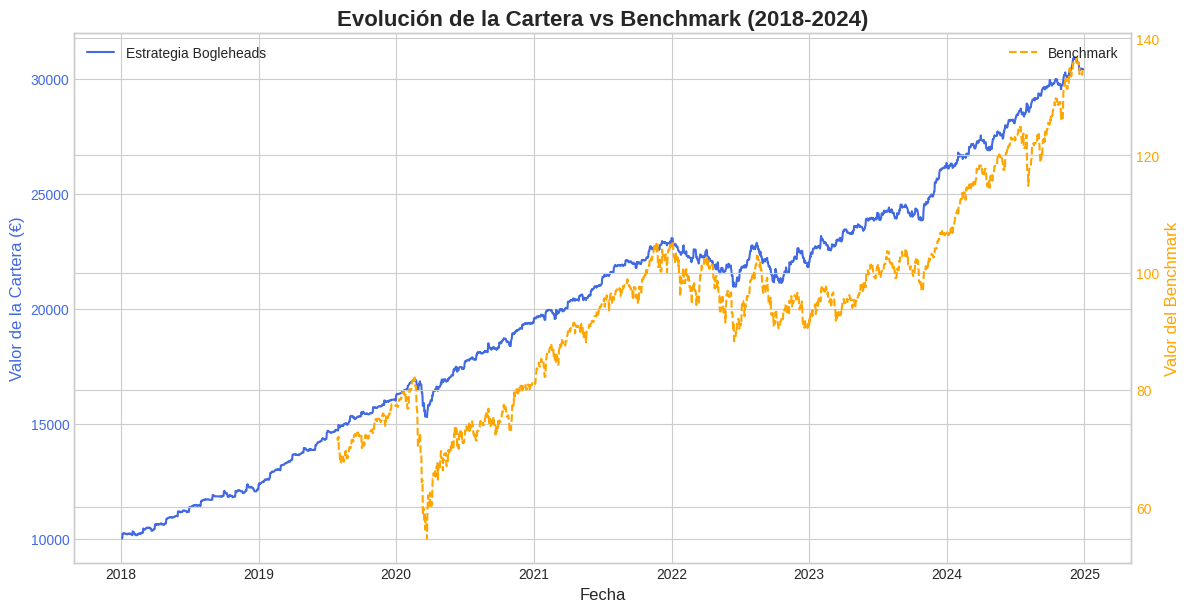

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime

class EstrategiaBogleheads:

    @staticmethod
    def _calcular_retornos_simples(dataframes_dict, pesos, start_date, end_date):
        """
        Método auxiliar para calcular y alinear los retornos diarios de los activos.
        """
        # Ordenar el índice de cada DataFrame para asegurar la monotonicidad
        precios_ordenados = {
            nombre: df.sort_index(ascending=True) for nombre, df in dataframes_dict.items()
        }

        # Filtrar los DataFrames por el rango de fechas
        precios_filtrados = {
            nombre: df[(df.index >= start_date) & (df.index <= end_date)]
            for nombre, df in precios_ordenados.items()
        }

        # Encontrar la primera fecha útil entre todos los activos
        primera_fecha_util = None
        for df in precios_filtrados.values():
            if not df.empty:
                if primera_fecha_util is None or df.index[0] > primera_fecha_util:
                    primera_fecha_util = df.index[0]

        if primera_fecha_util is None:
            raise ValueError("No hay datos disponibles para el rango de fechas especificado en ninguno de los activos.")

        # Crear un rango de fechas común para la alineación
        fechas_comunes = pd.date_range(start=primera_fecha_util, end=end_date, freq='D')

        # Alinear los precios y pesos
        precios_alineados = pd.DataFrame(index=fechas_comunes)
        df_pesos = pd.DataFrame(index=fechas_comunes, columns=precios_filtrados.keys())

        for nombre, df in precios_filtrados.items():
            if not df.empty:
                temp_df = df.reindex(fechas_comunes, method='pad')
                precios_alineados[nombre] = temp_df['Close']
                df_pesos[nombre] = pesos[nombre]

        # Eliminar filas con NaN en precios
        precios_alineados.dropna(inplace=True)
        if precios_alineados.empty:
            raise ValueError("No hay datos de precios comunes después de la alineación.")

        retornos = precios_alineados.pct_change().dropna()

        return precios_alineados, retornos, df_pesos

    @staticmethod
    def simular_inversiones_rebalanceo(dataframes_dict, pesos, inversion_inicial, aportacion_mensual, start_date, end_date):
        """
        Simula la evolución de la cartera con rebalanceo mensual,
        asegurando una gráfica suave aplicando los retornos diarios a las unidades.

        Args:
            dataframes_dict (dict): Diccionario de DataFrames de precios de los activos.
            pesos (dict): Diccionario con los pesos objetivo de cada activo.
            inversion_inicial (float): Valor de la primera inversión.
            aportacion_mensual (float): Valor de la aportación mensual.
            start_date (datetime): Fecha de inicio de la simulación.
            end_date (datetime): Fecha de fin de la simulación.

        Returns:
            dict: Diccionario con los resultados de la simulación.
        """
        try:
            precios, retornos, _ = EstrategiaBogleheads._calcular_retornos_simples(dataframes_dict, pesos, start_date, end_date)
        except ValueError as e:
            return {'error': str(e)}

        pesos_normalizados = np.array([pesos[k] for k in precios.columns])
        if pesos_normalizados.sum() == 0:
            raise ValueError("La suma de los pesos no puede ser cero.")
        pesos_normalizados = pesos_normalizados / pesos_normalizados.sum()

        capital_invertido = inversion_inicial

        historial_cartera = []
        fechas_cartera = []

        fecha_inicio_simulacion = precios.index[0]
        # Inicializar el último mes de rebalanceo antes del primer día de la simulación
        # para que el primer día no se cuente como un rebalanceo extra
        ultimo_mes_rebalanceo = fecha_inicio_simulacion.replace(day=1) - pd.DateOffset(months=1)

        # Calcular las unidades iniciales
        # El valor de la cartera el primer día es la inversión inicial
        unidades_por_activo = pd.Series(
            (pesos_normalizados * inversion_inicial) / precios.iloc[0].values,
            index=precios.columns
        )

        # El primer valor en el historial es la inversión inicial
        historial_cartera.append(inversion_inicial)
        fechas_cartera.append(fecha_inicio_simulacion)

        # Iterar a partir del segundo día, ya que el primer día ya se inicializó
        for i in range(1, len(precios)):
            fecha = precios.index[i]
            precios_actuales = precios.iloc[i]

            # 1. Aplicar rebalanceo y aportaciones si es el inicio de un nuevo mes
            primer_dia_mes_actual = fecha.replace(day=1)

            if primer_dia_mes_actual > ultimo_mes_rebalanceo:
                # Calcular el valor actual de la cartera (antes de la aportación y rebalanceo)
                valor_cartera_actual_pre = (unidades_por_activo * precios_actuales).sum()

                # Añadir la aportación mensual
                # Se asume una aportación mensual, pero el rebalanceo solo ocurre una vez al mes.
                # Para simplificar, la aportación se agrega en el día de rebalanceo.
                valor_total_con_aportacion = valor_cartera_actual_pre + aportacion_mensual
                capital_invertido += aportacion_mensual

                # Rebalancear las unidades según el nuevo valor total y pesos objetivo
                unidades_por_activo = pd.Series(
                    (pesos_normalizados * valor_total_con_aportacion) / precios_actuales.values,
                    index=precios.columns
                )

                ultimo_mes_rebalanceo = primer_dia_mes_actual

            # 2. Calcular el valor total de la cartera al final del día
            # (después de aplicar los retornos implícitos por el cambio de precios)
            valor_total_dia = (unidades_por_activo * precios_actuales).sum()
            historial_cartera.append(valor_total_dia)
            fechas_cartera.append(fecha)

        historial_cartera_series = pd.Series(historial_cartera, index=pd.to_datetime(fechas_cartera))
        valor_final = historial_cartera_series.iloc[-1] if not historial_cartera_series.empty else inversion_inicial
        anios_transcurridos = (end_date - start_date).days / 365.25

        return {
            'historial_cartera': historial_cartera_series,
            'valor_final': valor_final,
            'capital_invertido_total': capital_invertido,
            'anios_transcurridos': anios_transcurridos
        }

    # Asegúrate de que _calcular_max_drawdown existe y funciona correctamente:
    @staticmethod
    def _calcular_max_drawdown(retornos):
        """
        Calcula el máximo drawdown de una serie de retornos.
        """
        if retornos.empty:
            return 0.0 # O np.nan, dependiendo de cómo quieras manejarlo

        # Necesitamos la evolución del valor para calcular el drawdown, no solo los retornos
        # Asumiendo una inversión inicial de 1 para calcular la serie de valor
        acumulados = (1 + retornos).cumprod()
        pico = acumulados.expanding(min_periods=1).max()
        drawdown = (acumulados / pico) - 1
        return drawdown.min()

    @staticmethod
    def calcular_metricas_cartera(dataframes_dict, pesos_normalizados, start_date, end_date, benchmark_series):
        """
        Calcula diversas métricas de rendimiento y riesgo para la cartera.

        Args:
            dataframes_dict (dict): Diccionario de DataFrames de precios de los activos.
            pesos_normalizados (dict): Diccionario con los pesos normalizados de cada activo.
            start_date (datetime): Fecha de inicio del cálculo.
            end_date (datetime): Fecha de fin del cálculo.
            benchmark_series (pd.Series): Serie de Pandas con los precios de cierre del benchmark.

        Returns:
            dict: Diccionario con las métricas calculadas.
        """
        try:
            # Para calcular las métricas de la cartera, necesitamos su serie de retornos.
            # La forma más limpia es ejecutar una simulación sin aportaciones y con inversión inicial 1.
            simulacion_solo_retornos = EstrategiaBogleheads.simular_inversiones_rebalanceo(
                dataframes_dict, pesos_normalizados, 1, 0, start_date, end_date
            )

            if 'error' in simulacion_solo_retornos:
                raise ValueError(f"Error en la simulación para métricas: {simulacion_solo_retornos['error']}")

            # Obtener el historial de la cartera (normalizado para métricas)
            historial_valor_cartera = simulacion_solo_retornos['historial_cartera']
            retornos_cartera = historial_valor_cartera.pct_change().dropna()

            if retornos_cartera.empty:
                return {'error': "No hay retornos de cartera suficientes para calcular métricas."}

            dias_anuales = 252 # Número de días hábiles en un año para anualizar

            # --- METRICAS DE CARTERA ---
            rentabilidad_anualizada_cartera = (1 + retornos_cartera).prod()**(dias_anuales / len(retornos_cartera)) - 1
            volatilidad_anualizada_cartera = retornos_cartera.std() * np.sqrt(dias_anuales)

            # Cálculo del Max Drawdown de la cartera
            max_drawdown_cartera = EstrategiaBogleheads._calcular_max_drawdown(retornos_cartera)

            # Ratio de Sharpe (asumiendo rf_rate = 0.0, como se usa a menudo en ejemplos)
            sharpe_cartera = (rentabilidad_anualizada_cartera - 0.0) / volatilidad_anualizada_cartera if volatilidad_anualizada_cartera > 0 else np.nan

            # Ratio de Sortino (necesita calcular la volatilidad a la baja)
            downside_retornos = retornos_cartera[retornos_cartera < 0]
            volatilidad_negativa_anualizada = downside_retornos.std() * np.sqrt(dias_anuales) if not downside_retornos.empty else np.nan
            sortino_cartera = (rentabilidad_anualizada_cartera - 0.0) / volatilidad_negativa_anualizada if volatilidad_negativa_anualizada > 0 else np.nan

            # --- Ratio de Calmar ---
            # Ya tienes rentabilidad_anualizada_cartera y max_drawdown_cartera
            calmar_ratio = rentabilidad_anualizada_cartera / abs(max_drawdown_cartera) if max_drawdown_cartera != 0 else np.nan

            metricas = {
                'rentabilidad_anualizada_cartera': rentabilidad_anualizada_cartera,
                'volatilidad_anualizada_cartera': volatilidad_anualizada_cartera,
                'sharpe_cartera': sharpe_cartera,
                'sortino_cartera': sortino_cartera,
                'max_drawdown_cartera': max_drawdown_cartera,
                'calmar_ratio': calmar_ratio, # ¡Aquí se añade!
            }

            # --- MÉTRICAS VS BENCHMARK ---
            if benchmark_series is not None and not benchmark_series.empty:
                # Asegurar que el benchmark_series tenga el mismo rango de fechas que la cartera para alinear
                benchmark_alineado = benchmark_series.reindex(historial_valor_cartera.index, method='ffill').dropna()

                if not benchmark_alineado.empty and len(benchmark_alineado) > 1:
                    retornos_benchmark = benchmark_alineado.pct_change().dropna()

                    # Alinear retornos de cartera y benchmark
                    retornos_comparacion = pd.DataFrame({
                        'cartera': retornos_cartera,
                        'benchmark': retornos_benchmark
                    }).dropna()

                    if not retornos_comparacion.empty:
                        rc = retornos_comparacion['cartera']
                        rb = retornos_comparacion['benchmark']

                        # Tracking Error
                        tracking_error = (rc - rb).std() * np.sqrt(dias_anuales)

                        # Beta
                        cov = rc.cov(rb) # Covarianza entre cartera y benchmark
                        var_b = rb.var() # Varianza del benchmark
                        beta = cov / var_b if var_b != 0 else np.nan

                        # Alpha (simplificado: Alpha = Retorno Cartera - Retorno Benchmark * Beta)
                        # También podrías usar la fórmula clásica con tasa libre de riesgo
                        rentabilidad_anualizada_benchmark = (1 + rb).prod()**(dias_anuales / len(rb)) - 1
                        alpha = rentabilidad_anualizada_cartera - (rentabilidad_anualizada_benchmark * beta) if not np.isnan(beta) else np.nan

                        # Ratio de Información
                        ratio_informacion = alpha / tracking_error if tracking_error > 0 else np.nan

                        metricas.update({
                            'alpha': alpha,
                            'beta': beta,
                            'tracking_error': tracking_error,
                            'ratio_informacion': ratio_informacion,
                            'rentabilidad_anualizada_benchmark': rentabilidad_anualizada_benchmark,
                        })
                else:
                    print("Advertencia: El benchmark no tiene datos suficientes después de la alineación para comparar.")

            return metricas
        except Exception as e:
            return {'error': f"Error al calcular métricas: {e}"}


    @staticmethod
    def calcular_metricas_cartera(dataframes_dict, pesos_normalizados, start_date, end_date, benchmark_series):
        """
        Calcula diversas métricas de rendimiento y riesgo para la cartera.

        Args:
            dataframes_dict (dict): Diccionario de DataFrames de precios de los activos.
            pesos_normalizados (dict): Diccionario con los pesos normalizados de cada activo.
            start_date (datetime): Fecha de inicio del cálculo.
            end_date (datetime): Fecha de fin del cálculo.
            benchmark_series (pd.Series): Serie de Pandas con los precios de cierre del benchmark.

        Returns:
            dict: Diccionario con las métricas calculadas.
        """
        try:
            # Para calcular las métricas de la cartera, necesitamos su serie de retornos.
            # La forma más limpia es ejecutar una simulación sin aportaciones y con inversión inicial 1.
            simulacion_solo_retornos = EstrategiaBogleheads.simular_inversiones_rebalanceo(
                dataframes_dict, pesos_normalizados, 1, 0, start_date, end_date
            )

            if 'error' in simulacion_solo_retornos:
                raise ValueError(f"Error en la simulación para métricas: {simulacion_solo_retornos['error']}")

            # Obtener el historial de la cartera (normalizado para métricas)
            historial_valor_cartera = simulacion_solo_retornos['historial_cartera']
            retornos_cartera = historial_valor_cartera.pct_change().dropna()

            if retornos_cartera.empty:
                return {'error': "No hay retornos de cartera suficientes para calcular métricas."}

            dias_anuales = 252 # Número de días hábiles en un año para anualizar

            # --- METRICAS DE CARTERA ---
            rentabilidad_anualizada_cartera = (1 + retornos_cartera).prod()**(dias_anuales / len(retornos_cartera)) - 1
            volatilidad_anualizada_cartera = retornos_cartera.std() * np.sqrt(dias_anuales)

            # Cálculo del Max Drawdown de la cartera
            max_drawdown_cartera = EstrategiaBogleheads._calcular_max_drawdown(retornos_cartera)

            # Ratio de Sharpe (asumiendo rf_rate = 0.0, como se usa a menudo en ejemplos)
            sharpe_cartera = (rentabilidad_anualizada_cartera - 0.0) / volatilidad_anualizada_cartera if volatilidad_anualizada_cartera > 0 else np.nan

            # Ratio de Sortino (necesita calcular la volatilidad a la baja)
            downside_retornos = retornos_cartera[retornos_cartera < 0]
            volatilidad_negativa_anualizada = downside_retornos.std() * np.sqrt(dias_anuales) if not downside_retornos.empty else np.nan
            sortino_cartera = (rentabilidad_anualizada_cartera - 0.0) / volatilidad_negativa_anualizada if volatilidad_negativa_anualizada > 0 else np.nan

            # --- Ratio de Calmar ---
            # Ya tienes rentabilidad_anualizada_cartera y max_drawdown_cartera
            calmar_ratio = rentabilidad_anualizada_cartera / abs(max_drawdown_cartera) if max_drawdown_cartera != 0 else np.nan

            metricas = {
                'rentabilidad_anualizada_cartera': rentabilidad_anualizada_cartera,
                'volatilidad_anualizada_cartera': volatilidad_anualizada_cartera,
                'sharpe_cartera': sharpe_cartera,
                'sortino_cartera': sortino_cartera,
                'max_drawdown_cartera': max_drawdown_cartera,
                'calmar_ratio': calmar_ratio, # ¡Aquí se añade!
            }

            # --- MÉTRICAS VS BENCHMARK ---
            if benchmark_series is not None and not benchmark_series.empty:
                # Asegurar que el benchmark_series tenga el mismo rango de fechas que la cartera para alinear
                benchmark_alineado = benchmark_series.reindex(historial_valor_cartera.index, method='ffill').dropna()

                if not benchmark_alineado.empty and len(benchmark_alineado) > 1:
                    retornos_benchmark = benchmark_alineado.pct_change().dropna()

                    # Alinear retornos de cartera y benchmark
                    retornos_comparacion = pd.DataFrame({
                        'cartera': retornos_cartera,
                        'benchmark': retornos_benchmark
                    }).dropna()

                    if not retornos_comparacion.empty:
                        rc = retornos_comparacion['cartera']
                        rb = retornos_comparacion['benchmark']

                        # Tracking Error
                        tracking_error = (rc - rb).std() * np.sqrt(dias_anuales)

                        # Beta
                        cov = rc.cov(rb) # Covarianza entre cartera y benchmark
                        var_b = rb.var() # Varianza del benchmark
                        beta = cov / var_b if var_b != 0 else np.nan

                        # Alpha (simplificado: Alpha = Retorno Cartera - Retorno Benchmark * Beta)
                        # También podrías usar la fórmula clásica con tasa libre de riesgo
                        rentabilidad_anualizada_benchmark = (1 + rb).prod()**(dias_anuales / len(rb)) - 1
                        alpha = rentabilidad_anualizada_cartera - (rentabilidad_anualizada_benchmark * beta) if not np.isnan(beta) else np.nan

                        # Ratio de Información
                        ratio_informacion = alpha / tracking_error if tracking_error > 0 else np.nan

                        metricas.update({
                            'alpha': alpha,
                            'beta': beta,
                            'tracking_error': tracking_error,
                            'ratio_informacion': ratio_informacion,
                            'rentabilidad_anualizada_benchmark': rentabilidad_anualizada_benchmark,
                        })
                else:
                    print("Advertencia: El benchmark no tiene datos suficientes después de la alineación para comparar.")

            return metricas
        except Exception as e:
            return {'error': f"Error al calcular métricas: {e}"}

    @staticmethod
    def _calcular_max_drawdown(retornos):
        """
        Calcula el máximo drawdown de una serie de retornos.
        """
        acumulados = (1 + retornos).cumprod()
        pico = acumulados.expanding(min_periods=1).max()
        drawdown = (acumulados / pico) - 1
        return drawdown.min()

    @staticmethod
    def diagnostico_metricas(metricas):
        """
        Proporciona un diagnóstico simple basado en las métricas.
        """
        comentarios = []
        if 'sharpe_cartera' in metricas and metricas['sharpe_cartera'] > 1:
            comentarios.append("✅ El ratio de Sharpe es superior a 1, lo que indica un buen rendimiento ajustado al riesgo.")
        else:
            comentarios.append("⚠️ El ratio de Sharpe es bajo, sugiriendo que el rendimiento no compensa adecuadamente la volatilidad.")

        if 'beta' in metricas and metricas['beta'] < 1:
            comentarios.append("🛡️ La beta es menor que 1, lo que indica que la cartera es menos volátil que el benchmark.")
        else:
            comentarios.append("📈 La beta es mayor que 1, lo que indica que la cartera es más volátil que el benchmark.")

        if 'alpha' in metricas and metricas['alpha'] > 0:
            comentarios.append("🌟 El alpha es positivo, lo que sugiere que la cartera ha superado al benchmark.")
        else:
            comentarios.append("📉 El alpha es negativo, lo que indica que la cartera ha quedado por debajo del benchmark.")

        if 'max_drawdown_cartera' in metricas and metricas['max_drawdown_cartera'] > -0.2:
            comentarios.append("👍 El máximo drawdown es moderado, mostrando resiliencia en mercados bajistas.")
        else:
            comentarios.append("⚠️ La cartera ha experimentado un drawdown significativo, lo que merece atención.")

        return comentarios

    @staticmethod
    def graficar_evolucion(historial_cartera, titulo='Evolución del Capital de la Cartera'):
        """
        Grafica la evolución del valor de la cartera a lo largo del tiempo.

        Args:
            historial_cartera (pd.Series): Serie de Pandas con el valor de la cartera, indexado por fecha.
            titulo (str): Título del gráfico.
        """
        plt.style.use('seaborn-v0_8-whitegrid')
        plt.figure(figsize=(12, 6))

        historial_cartera.plot(label='Estrategia Bogleheads', color='royalblue')

        plt.title(titulo, fontsize=16, fontweight='bold')
        plt.xlabel('Fecha', fontsize=12)
        plt.ylabel('Valor de la Inversión (€)', fontsize=12)
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    @staticmethod
    def graficar_evolucion_con_benchmark(historial_cartera, historial_benchmark=None, titulo='Evolución de la Cartera'):
        """
        Grafica la evolución del valor de la cartera y del benchmark utilizando dos ejes Y.

        Args:
            historial_cartera (pd.Series): Serie de Pandas con el valor de la cartera, indexado por fecha.
            historial_benchmark (pd.Series, opcional): Serie de Pandas con el valor del benchmark.
            titulo (str): Título del gráfico.
        """
        plt.style.use('seaborn-v0_8-whitegrid')
        fig, ax1 = plt.subplots(figsize=(12, 6))

        # Eje Y izquierdo para la cartera
        ax1.set_xlabel('Fecha', fontsize=12)
        ax1.set_ylabel('Valor de la Cartera (€)', color='royalblue', fontsize=12)
        ax1.plot(historial_cartera.index, historial_cartera, label='Estrategia Bogleheads', color='royalblue')
        ax1.tick_params(axis='y', labelcolor='royalblue')

        # Eje Y derecho para el benchmark
        if historial_benchmark is not None and not historial_benchmark.empty:
            ax2 = ax1.twinx()  # Crea un segundo eje Y que comparte el mismo eje X
            ax2.set_ylabel('Valor del Benchmark', color='orange', fontsize=12)

            # Asegurarse de que el benchmark_series tenga el mismo rango de fechas que la cartera
            # o al menos se reindexe para evitar problemas.
            # Aquí lo reindexamos a las fechas de la cartera y rellenamos NaN con el método 'ffill'
            benchmark_alineado = historial_benchmark.reindex(historial_cartera.index, method='ffill')

            # Solo graficamos si el benchmark alineado tiene datos válidos
            if not benchmark_alineado.empty and not benchmark_alineado.isnull().all():
                ax2.plot(benchmark_alineado.index, benchmark_alineado, label='Benchmark', color='orange', linestyle='--')
                ax2.tick_params(axis='y', labelcolor='orange')
                ax2.legend(loc='upper right')
            else:
                print("Advertencia: El benchmark no pudo ser alineado o está vacío después de la alineación. No se graficará.")

        fig.tight_layout()  # Ajusta el layout para evitar superposiciones
        ax1.set_title(titulo, fontsize=16, fontweight='bold')
        ax1.legend(loc='upper left')
        plt.show()

# ... (El resto de tu código, incluyendo la función ejecutar_simulacion y la invocación final)

# =======================================================================================
# MAIN SCRIPT
# =======================================================================================

def ejecutar_simulacion(gestor):
    """
    Función principal para ejecutar la simulación completa con debugging
    """

    # --- Input interactivo de fechas ---
    while True:
        try:
            start_date_str = input("\nIntroduce la fecha de inicio (formato YYYY-MM-DD): ")
            start_date = datetime.strptime(start_date_str, '%Y-%m-%d')

            end_date_str = input("Introduce la fecha de fin (formato YYYY-MM-DD): ")
            end_date = datetime.strptime(end_date_str, '%Y-%m-%d')

            if start_date >= end_date:
                raise ValueError("La fecha de inicio debe ser anterior a la fecha de fin.")
            break
        except ValueError as e:
            print(f"Entrada de fecha inválida: {e}. Inténtalo de nuevo.")

    # --- Benchmark Section MEJORADA ---
    # Este bloque debe estar FUERA del bucle while para que se ejecute una sola vez
    print(f"\n🔍 Descargando benchmark S&P 500 para el período {start_date_str} a {end_date_str}...")

    try:
        end_date_extended = end_date + pd.Timedelta(days=1)

        benchmark_raw = yf.download(
            'VWCE.DE',
            start=start_date.strftime('%Y-%m-%d'),
            end=end_date_extended.strftime('%Y-%m-%d'),
            auto_adjust=True,
            progress=False
        )

        # 💡 Lógica corregida para manejar la estructura de columnas de yfinance
        if isinstance(benchmark_raw.columns, pd.MultiIndex):
            # Si es un MultiIndex (caso de varios tickers), seleccionar el que nos interesa
            if 'VWCE.DE' in benchmark_raw.columns.get_level_values(1):
                benchmark_raw = benchmark_raw.loc[:, (slice(None), 'VWCE.DE')]
                benchmark_raw.columns = benchmark_raw.columns.droplevel(1)
            else:
                print("❌ El ticker 'VWCE.DE' no se encontró en el MultiIndex.")
                benchmark_series = None

        # Continuar solo si se pudo procesar el DataFrame
        if benchmark_raw is not None and not benchmark_raw.empty:
            print(f"📊 Datos benchmark descargados: {len(benchmark_raw)} filas")
            print(f"📊 Columnas disponibles: {list(benchmark_raw.columns)}")
            if len(benchmark_raw) > 0:
                print(f"📊 Rango de fechas benchmark: {benchmark_raw.index.min()} a {benchmark_raw.index.max()}")

            if 'Close' in benchmark_raw.columns and len(benchmark_raw) > 0:
                benchmark_series = benchmark_raw['Close'].dropna()
                print(f"📊 Serie benchmark final: {len(benchmark_series)} observaciones")
                if len(benchmark_series) > 0:
                    print(f"📊 Primeros 3 valores benchmark:")
                    print(benchmark_series.head(3))
                    print(f"📊 Últimos 3 valores benchmark:")
                    print(benchmark_series.tail(3))
                else:
                    print("❌ La serie 'Close' está vacía después de eliminar valores nulos.")
                    benchmark_series = None
            else:
                print("❌ No se encontró la columna 'Close' o datos vacíos.")
                benchmark_series = None
        else:
            print("❌ La descarga de datos del benchmark resultó en un DataFrame vacío.")
            benchmark_series = None

    except Exception as e:
        print(f"❌ Error al descargar datos del benchmark: {e}")
        import traceback
        traceback.print_exc()
        benchmark_series = None

    # --- Input interactivo de pesos ---
    pesos = {}
    print("\nIntroduce los pesos para cada fondo (por ejemplo: 0.5):")
    for nombre in gestor.df_dict.keys():
        while True:
            try:
                peso = float(input(f"Peso para {nombre}: "))
                if peso < 0:
                    raise ValueError("El peso no puede ser negativo.")
                pesos[nombre] = peso
                break
            except ValueError as e:
                print(f"Entrada inválida: {e}")
    suma_pesos = sum(pesos.values())
    if suma_pesos == 0:
        raise ValueError("La suma de los pesos no puede ser cero.")

    pesos_normalizados_dict = {k: v / suma_pesos for k, v in pesos.items()}
    while True:
        try:
            inversion_inicial = float(input("\nIntroduce el importe de la primera inversión (p.ej., 1000): "))
            aportacion_mensual = float(input("Introduce el importe de la aportación mensual (p.ej., 100): "))
            if inversion_inicial <= 0:
                raise ValueError("La inversión inicial debe ser mayor que 0.")
            if aportacion_mensual < 0:
                raise ValueError("La aportación mensual no puede ser negativa.")
            break
        except ValueError as e:
            print(f"Entrada inválida: {e}")

    print("\n🔄 Ejecutando simulación de cartera...")
    simulacion_resultados = EstrategiaBogleheads.simular_inversiones_rebalanceo(
        gestor.df_dict, pesos, inversion_inicial, aportacion_mensual, start_date, end_date
    )
    if 'error' in simulacion_resultados:
        print(f"\nError en la simulación: {simulacion_resultados['error']}")
        return

    # --- DEBUGGING SOLO AQUÍ ---
    print(f"\n🔍 DEBUG: Benchmark antes de métricas - Tipo: {type(benchmark_series)}, Es None: {benchmark_series is None}")
    if benchmark_series is not None and hasattr(benchmark_series, '__len__'):
        print(f"🔍 DEBUG: Benchmark longitud: {len(benchmark_series)}")

    print("\n📈 Calculando métricas de la cartera...")
    metricas = EstrategiaBogleheads.calcular_metricas_cartera(
        gestor.df_dict, pesos_normalizados_dict, start_date, end_date, benchmark_series
    )

    if 'error' in metricas:
        print(f"\nError al calcular métricas: {metricas['error']}")
        return
    metricas.update(simulacion_resultados)

    print("\n" + "="*60)
    print("📈 RESUMEN DE LA SIMULACIÓN")
    print("="*60)
    print(f"Período analizado: {start_date.strftime('%Y-%m-%d')} a {end_date.strftime('%Y-%m-%d')}")
    print(f"Duración: {simulacion_resultados['anios_transcurridos']:.2f} años")
    print(f"Capital total invertido: {simulacion_resultados['capital_invertido_total']:,.2f} €")
    print(f"Valor final de la cartera: {simulacion_resultados['valor_final']:,.2f} €")
    if simulacion_resultados['capital_invertido_total'] > 0 and simulacion_resultados['anios_transcurridos'] > 0:
        rentabilidad_total = (simulacion_resultados['valor_final'] / simulacion_resultados['capital_invertido_total']) - 1
        cagr = ((1 + rentabilidad_total) ** (1/simulacion_resultados['anios_transcurridos'])) - 1

        print(f"Rentabilidad total: {rentabilidad_total*100:.2f}%")
        print(f"CAGR (Rentabilidad Anual Compuesta): {cagr*100:.2f}%")
        ganancia_total = simulacion_resultados['valor_final'] - simulacion_resultados['capital_invertido_total']
        print(f"Ganancia/Pérdida total: {ganancia_total:,.2f} €")

    print(f"\nPesos utilizados:")
    for activo, peso in pesos_normalizados_dict.items():
        print(f"  • {activo}: {peso*100:.1f}%")
    print(f"\n📊 MÉTRICAS DE LA CARTERA")
    print("="*60)
    metricas_display = {
        'rentabilidad_anualizada_cartera': 'Rentabilidad anualizada',
        'volatilidad_anualizada_cartera': 'Volatilidad anualizada',
        'sharpe_cartera': 'Ratio de Sharpe',
        'sortino_cartera': 'Ratio de Sortino',
        'calmar_ratio': 'Ratio de Calmar',
        'max_drawdown_cartera': 'Máxima caída',
        'alpha': 'Alpha (vs benchmark)',
        'beta': 'Beta (vs benchmark)',
        'tracking_error': 'Error de seguimiento',
        'ratio_informacion': 'Ratio de información'
    }

    for key, label in metricas_display.items():
        value = metricas.get(key, np.nan)
        if not np.isnan(value):
            if key in ['rentabilidad_anualizada_cartera', 'volatilidad_anualizada_cartera', 'alpha', 'tracking_error']:
                print(f"{label}: {value*100:.2f}%")
            elif key == 'max_drawdown_cartera':
                print(f"{label}: {value*100:.2f}%")
            else:
                print(f"{label}: {value:.4f}")
        else:
            print(f"{label}: No disponible")
    print(f"\n🧠 DIAGNÓSTICO AUTOMÁTICO")
    print("="*60)
    for comentario in EstrategiaBogleheads.diagnostico_metricas(metricas):
        print(comentario)
    print("="*60 + "\n")

    # Añade esto al final de la función, antes del último 'return metricas'
    #print("\n📊 Generando gráfico de evolución...")
    #EstrategiaBogleheads.graficar_evolucion(
        #historial_cartera=simulacion_resultados['historial_cartera'],
        #titulo=f"Evolución del Capital de la Cartera ({start_date.year}-{end_date.year})"
    #)

    # Añade esto al final de la función, antes del último 'return metricas'
    print("\n📊 Generando gráfico de evolución...")
    EstrategiaBogleheads.graficar_evolucion_con_benchmark(
        historial_cartera=simulacion_resultados['historial_cartera'],
        historial_benchmark=benchmark_series,
        titulo=f"Evolución de la Cartera vs Benchmark ({start_date.year}-{end_date.year})"
    )

    return metricas

# 🚀 ¡INVOCACIÓN FINAL! 🚀

print("🚀 Iniciando proceso de importación de datos...")
RUTA_BASE_DATOS = './Datos'
#RUTA_BASE_DATOS = os.path.abspath('./Estrategia_bogleheads/Datos')

gestor = GestorImportaciones(RUTA_BASE_DATOS)
gestor.importar_multiples_csv()

print (" --- Inicio del análisis---")
# Llamada a la función principal que ahora descarga su propio benchmark
resultados = ejecutar_simulacion(gestor)

# Inversión en un Plan de Pensiones

🚀 Iniciando proceso de importación de datos...

📅 Selección de rango de fechas
💡 Formato recomendado: YYYY-MM-DD (ej: 2023-01-01)


👉 Fecha de inicio (ENTER para todas las fechas):  
👉 Fecha de fin (solo si especificaste fecha inicio):  


✅ Rango seleccionado: None - None

📁 Selección 1

📁 Carpetas disponibles:
[0] Ficheros_bogleheads
[1] Descargas_R4_vanguard
[2] Probar_descargas



👉 Selecciona el número de carpeta:  0



📄 CSV disponibles:
[0] vliq_IE00BDCXSH02.csv
[1] vliq_IE00BH65QP47.csv
[2] IE00BH65QP47.csv
[3] MSCI_world.csv
[4] vliq_IE00B42W4L06.csv
[5] IE00BDCXSH02.csv
[6] vliq_IE00B03HD191.csv
[7] IE0031786142.csv
[8] IE00B42W4L06.csv
[9] vliq_IE00B18GC888.csv
[10] FR0011365212.csv
[11] IE00B18GC888.csv
[12] IE00B03HD191.csv
[13] PlanPensiones.csv
[14] FR0000447823.csv
[15] FR0013346079.csv
[16] FR001400CFA4.csv
[17] FR0000989626.csv
[18] FR0000991390.csv
[19] vliq_LU0080237943.csv
[20] vliq_IE0031786142.csv



👉 Selecciona el número de archivo:  4



🧪 Separador detectado: ',' | Decimal: '.'
✅ Conversión de fecha exitosa.
📊 Importando todos los datos disponibles
✅ DataFrame 'vliq_IE00B42W4L06' cargado con shape (771, 5)



🧭 ¿Deseas importar otro archivo? (s/n):  s



📁 Selección 2

📁 Carpetas disponibles:
[0] Ficheros_bogleheads
[1] Descargas_R4_vanguard
[2] Probar_descargas



👉 Selecciona el número de carpeta:  0



📄 CSV disponibles:
[0] vliq_IE00BDCXSH02.csv
[1] vliq_IE00BH65QP47.csv
[2] IE00BH65QP47.csv
[3] MSCI_world.csv
[4] vliq_IE00B42W4L06.csv
[5] IE00BDCXSH02.csv
[6] vliq_IE00B03HD191.csv
[7] IE0031786142.csv
[8] IE00B42W4L06.csv
[9] vliq_IE00B18GC888.csv
[10] FR0011365212.csv
[11] IE00B18GC888.csv
[12] IE00B03HD191.csv
[13] PlanPensiones.csv
[14] FR0000447823.csv
[15] FR0013346079.csv
[16] FR001400CFA4.csv
[17] FR0000989626.csv
[18] FR0000991390.csv
[19] vliq_LU0080237943.csv
[20] vliq_IE0031786142.csv



👉 Selecciona el número de archivo:  11



🧪 Separador detectado: ',' | Decimal: '.'
✅ Conversión de fecha exitosa.
📊 Importando todos los datos disponibles
✅ DataFrame 'IE00B18GC888' cargado con shape (1954, 1)



🧭 ¿Deseas importar otro archivo? (s/n):  n



📊 DataFrames importados:
🔹 'vliq_IE00B42W4L06' → shape: (771, 5)
🔹 'IE00B18GC888' → shape: (1954, 1)

✅ Proceso finalizado.
 --- Inicio del análisis---



Introduce la fecha de inicio (formato YYYY-MM-DD):  2018-01-04
Introduce la fecha de fin (formato YYYY-MM-DD):  2024-12-29



🔍 Descargando benchmark S&P 500 para el período 2018-01-04 a 2024-12-29...
📊 Datos benchmark descargados: 1381 filas
📊 Columnas disponibles: ['Close', 'High', 'Low', 'Open', 'Volume']
📊 Rango de fechas benchmark: 2019-07-29 00:00:00 a 2024-12-27 00:00:00
📊 Serie benchmark final: 1381 observaciones
📊 Primeros 3 valores benchmark:
Date
2019-07-29    71.849998
2019-07-30    71.440002
2019-07-31    71.550003
Name: Close, dtype: float64
📊 Últimos 3 valores benchmark:
Date
2024-12-20    134.059998
2024-12-23    133.759995
2024-12-27    134.360001
Name: Close, dtype: float64

Introduce los pesos para cada fondo (por ejemplo: 0.5):


Peso para vliq_IE00B42W4L06:  0.25
Peso para IE00B18GC888:  0.75

Introduce el importe de la primera inversión (p.ej., 1000):  10000
Introduce el importe de la aportación mensual (p.ej., 100):  200



🔄 Ejecutando simulación de cartera...

🔍 DEBUG: Benchmark antes de métricas - Tipo: <class 'pandas.core.series.Series'>, Es None: False
🔍 DEBUG: Benchmark longitud: 1381

📈 Calculando métricas de la cartera...

📈 RESUMEN DE LA SIMULACIÓN
Período analizado: 2018-01-04 a 2024-12-29
Duración: 6.98 años
Capital total invertido: 26,600.00 €
Valor final de la cartera: 29,502.45 €
Rentabilidad total: 10.91%
CAGR (Rentabilidad Anual Compuesta): 1.49%
Ganancia/Pérdida total: 2,902.45 €

Pesos utilizados:
  • vliq_IE00B42W4L06: 25.0%
  • IE00B18GC888: 75.0%

📊 MÉTRICAS DE LA CARTERA
Rentabilidad anualizada: 5.81%
Volatilidad anualizada: 17.75%
Ratio de Sharpe: 0.3271
Ratio de Sortino: 0.3141
Ratio de Calmar: No disponible
Máxima caída: -17.11%
Alpha (vs benchmark): -11.87%
Beta (vs benchmark): -0.0192
Error de seguimiento: 26.84%
Ratio de información: -0.4422

🧠 DIAGNÓSTICO AUTOMÁTICO
⚠️ El ratio de Sharpe es bajo, sugiriendo que el rendimiento no compensa adecuadamente la volatilidad.
🛡️ La be

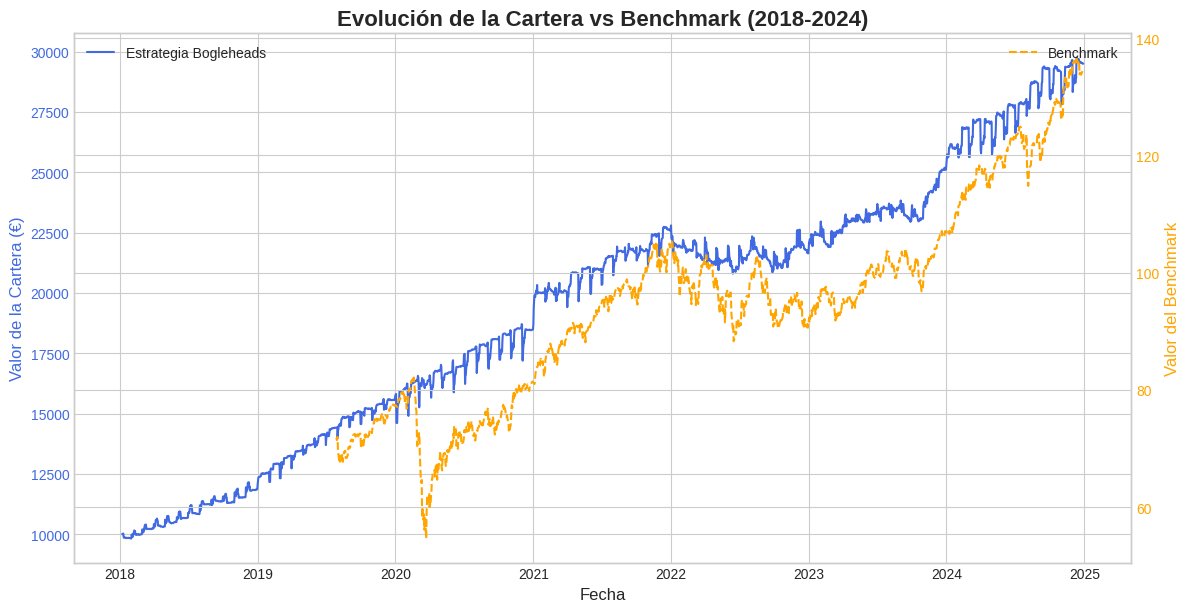

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime

class EstrategiaBogleheads:

    @staticmethod
    def _calcular_retornos_simples(dataframes_dict, pesos, start_date, end_date):
        """
        Método auxiliar para calcular y alinear los retornos diarios de los activos.
        """
        # Ordenar el índice de cada DataFrame para asegurar la monotonicidad
        precios_ordenados = {
            nombre: df.sort_index(ascending=True) for nombre, df in dataframes_dict.items()
        }

        # Filtrar los DataFrames por el rango de fechas
        precios_filtrados = {
            nombre: df[(df.index >= start_date) & (df.index <= end_date)]
            for nombre, df in precios_ordenados.items()
        }

        # Encontrar la primera fecha útil entre todos los activos
        primera_fecha_util = None
        for df in precios_filtrados.values():
            if not df.empty:
                if primera_fecha_util is None or df.index[0] > primera_fecha_util:
                    primera_fecha_util = df.index[0]

        if primera_fecha_util is None:
            raise ValueError("No hay datos disponibles para el rango de fechas especificado en ninguno de los activos.")

        # Crear un rango de fechas común para la alineación
        fechas_comunes = pd.date_range(start=primera_fecha_util, end=end_date, freq='D')

        # Alinear los precios y pesos
        precios_alineados = pd.DataFrame(index=fechas_comunes)
        df_pesos = pd.DataFrame(index=fechas_comunes, columns=precios_filtrados.keys())

        for nombre, df in precios_filtrados.items():
            if not df.empty:
                temp_df = df.reindex(fechas_comunes, method='pad')
                precios_alineados[nombre] = temp_df['Close']
                df_pesos[nombre] = pesos[nombre]

        # Eliminar filas con NaN en precios
        precios_alineados.dropna(inplace=True)
        if precios_alineados.empty:
            raise ValueError("No hay datos de precios comunes después de la alineación.")

        retornos = precios_alineados.pct_change().dropna()

        return precios_alineados, retornos, df_pesos

    @staticmethod
    def simular_inversiones_rebalanceo(dataframes_dict, pesos, inversion_inicial, aportacion_mensual, start_date, end_date):
        """
        Simula la evolución de la cartera con rebalanceo mensual,
        corrigiendo el comportamiento de la aportación para una gráfica suave.

        Args:
            dataframes_dict (dict): Diccionario de DataFrames de precios de los activos.
            pesos (dict): Diccionario con los pesos objetivo de cada activo.
            inversion_inicial (float): Valor de la primera inversión.
            aportacion_mensual (float): Valor de la aportación mensual.
            start_date (datetime): Fecha de inicio de la simulación.
            end_date (datetime): Fecha de fin de la simulación.

        Returns:
            dict: Diccionario con los resultados de la simulación.
        """
        try:
            precios, retornos, df_pesos = EstrategiaBogleheads._calcular_retornos_simples(dataframes_dict, pesos, start_date, end_date)
        except ValueError as e:
            return {'error': str(e)}

        pesos_normalizados = np.array([pesos[k] for k in precios.columns])
        if pesos_normalizados.sum() == 0:
            raise ValueError("La suma de los pesos no puede ser cero.")
        pesos_normalizados = pesos_normalizados / pesos_normalizados.sum()

        valor_total = inversion_inicial
        capital_invertido = inversion_inicial

        historial_cartera = []
        fechas_cartera = []

        fecha_inicio_simulacion = precios.index[0]
        ultimo_mes_rebalanceo = fecha_inicio_simulacion.replace(day=1)

        unidades_por_activo = dict(zip(precios.columns, (pesos_normalizados * valor_total) / precios.iloc[0]))

        for fecha, row in retornos.iterrows():
            primer_dia_mes_actual = fecha.replace(day=1)

            if primer_dia_mes_actual > ultimo_mes_rebalanceo:
                meses_transcurridos = (primer_dia_mes_actual.year - ultimo_mes_rebalanceo.year) * 12 + \
                                     (primer_dia_mes_actual.month - ultimo_mes_rebalanceo.month)

                if meses_transcurridos > 0:
                    valor_cartera_actual = sum(unidades_por_activo[activo] * precios.loc[fecha, activo] for activo in unidades_por_activo)
                    aportacion_total = aportacion_mensual * meses_transcurridos
                    valor_total_nuevo = valor_cartera_actual + aportacion_total
                    capital_invertido += aportacion_total

                    for activo in unidades_por_activo:
                        valor_objetivo_activo = valor_total_nuevo * pesos_normalizados[precios.columns.get_loc(activo)]
                        unidades_por_activo[activo] = valor_objetivo_activo / precios.loc[fecha, activo]

                    ultimo_mes_rebalanceo = primer_dia_mes_actual

            valor_total_dia = sum(unidades_por_activo[activo] * precios.loc[fecha, activo] for activo in unidades_por_activo)
            historial_cartera.append(valor_total_dia)
            fechas_cartera.append(fecha)

        historial_cartera_series = pd.Series(historial_cartera, index=pd.to_datetime(fechas_cartera))
        valor_final = historial_cartera_series.iloc[-1] if not historial_cartera_series.empty else inversion_inicial
        anios_transcurridos = (end_date - start_date).days / 365.25

        return {
            'historial_cartera': historial_cartera_series,
            'valor_final': valor_final,
            'capital_invertido_total': capital_invertido,
            'anios_transcurridos': anios_transcurridos
        }

    @staticmethod
    def calcular_metricas_cartera(dataframes_dict, pesos_normalizados, start_date, end_date, benchmark_series):
        # Esta es la implementación completa de la función de cálculo de métricas.

        try:
            precios, retornos_cartera, _ = EstrategiaBogleheads._calcular_retornos_simples(dataframes_dict, pesos_normalizados, start_date, end_date)
            retornos_cartera = EstrategiaBogleheads.simular_inversiones_rebalanceo(
                dataframes_dict, pesos_normalizados, 1, 0, start_date, end_date
            )['historial_cartera'].pct_change().dropna()

            # Asegurar que el benchmark_series no sea None
            if benchmark_series is None or benchmark_series.empty:
                benchmark_retornos = pd.Series()
            else:
                benchmark_retornos = benchmark_series.pct_change().dropna()

            # Alinear los retornos de la cartera y el benchmark
            retornos_alineados = pd.DataFrame({'cartera': retornos_cartera})
            if not benchmark_retornos.empty:
                retornos_alineados['benchmark'] = benchmark_retornos

            retornos_alineados.dropna(inplace=True)

            if retornos_alineados.empty or 'cartera' not in retornos_alineados.columns:
                return {'error': "No hay datos suficientes para calcular las métricas."}

            # Cálculo de métricas
            dias_por_anio = 365.25

            rentabilidad_anualizada_cartera = (1 + retornos_alineados['cartera']).prod()**(dias_por_anio / len(retornos_alineados)) - 1
            volatilidad_anualizada_cartera = retornos_alineados['cartera'].std() * np.sqrt(dias_por_anio)

            metricas = {
                'rentabilidad_anualizada_cartera': rentabilidad_anualizada_cartera,
                'volatilidad_anualizada_cartera': volatilidad_anualizada_cartera,
                'max_drawdown_cartera': EstrategiaBogleheads._calcular_max_drawdown(retornos_cartera)
            }

            if 'benchmark' in retornos_alineados.columns:
                retorno_benchmark = (1 + retornos_alineados['benchmark']).prod()**(dias_por_anio / len(retornos_alineados)) - 1
                volatilidad_benchmark = retornos_alineados['benchmark'].std() * np.sqrt(dias_por_anio)

                # Calcular Sharpe y Sortino (asumiendo un tipo sin riesgo de 0)
                sharpe = (rentabilidad_anualizada_cartera - 0) / volatilidad_anualizada_cartera
                downside_retornos = retornos_alineados['cartera'][retornos_alineados['cartera'] < 0]
                volatilidad_negativa = downside_retornos.std() * np.sqrt(dias_por_anio)
                sortino = (rentabilidad_anualizada_cartera - 0) / volatilidad_negativa if volatilidad_negativa != 0 else np.nan

                # Calcular Beta y Alpha
                covarianza = retornos_alineados.cov().loc['cartera', 'benchmark']
                varianza_benchmark = retornos_alineados['benchmark'].var()
                beta = covarianza / varianza_benchmark if varianza_benchmark != 0 else np.nan

                alpha = rentabilidad_anualizada_cartera - (retorno_benchmark + beta * (retorno_benchmark - 0))

                # Calcular Tracking Error y Ratio de Información
                tracking_error = (retornos_alineados['cartera'] - retornos_alineados['benchmark']).std() * np.sqrt(dias_por_anio)
                ratio_informacion = alpha / tracking_error if tracking_error != 0 else np.nan

                metricas.update({
                    'sharpe_cartera': sharpe,
                    'sortino_cartera': sortino,
                    'alpha': alpha,
                    'beta': beta,
                    'tracking_error': tracking_error,
                    'ratio_informacion': ratio_informacion,
                    'rentabilidad_anualizada_benchmark': retorno_benchmark,
                    'volatilidad_anualizada_benchmark': volatilidad_benchmark,
                })

            return metricas
        except Exception as e:
            return {'error': f"Error al calcular métricas: {e}"}

    @staticmethod
    def _calcular_max_drawdown(retornos):
        """
        Calcula el máximo drawdown de una serie de retornos.
        """
        acumulados = (1 + retornos).cumprod()
        pico = acumulados.expanding(min_periods=1).max()
        drawdown = (acumulados / pico) - 1
        return drawdown.min()

    @staticmethod
    def diagnostico_metricas(metricas):
        """
        Proporciona un diagnóstico simple basado en las métricas.
        """
        comentarios = []
        if 'sharpe_cartera' in metricas and metricas['sharpe_cartera'] > 1:
            comentarios.append("✅ El ratio de Sharpe es superior a 1, lo que indica un buen rendimiento ajustado al riesgo.")
        else:
            comentarios.append("⚠️ El ratio de Sharpe es bajo, sugiriendo que el rendimiento no compensa adecuadamente la volatilidad.")

        if 'beta' in metricas and metricas['beta'] < 1:
            comentarios.append("🛡️ La beta es menor que 1, lo que indica que la cartera es menos volátil que el benchmark.")
        else:
            comentarios.append("📈 La beta es mayor que 1, lo que indica que la cartera es más volátil que el benchmark.")

        if 'alpha' in metricas and metricas['alpha'] > 0:
            comentarios.append("🌟 El alpha es positivo, lo que sugiere que la cartera ha superado al benchmark.")
        else:
            comentarios.append("📉 El alpha es negativo, lo que indica que la cartera ha quedado por debajo del benchmark.")

        if 'max_drawdown_cartera' in metricas and metricas['max_drawdown_cartera'] > -0.2:
            comentarios.append("👍 El máximo drawdown es moderado, mostrando resiliencia en mercados bajistas.")
        else:
            comentarios.append("⚠️ La cartera ha experimentado un drawdown significativo, lo que merece atención.")

        return comentarios

    @staticmethod
    def graficar_evolucion(historial_cartera, titulo='Evolución del Capital de la Cartera'):
        """
        Grafica la evolución del valor de la cartera a lo largo del tiempo.

        Args:
            historial_cartera (pd.Series): Serie de Pandas con el valor de la cartera, indexado por fecha.
            titulo (str): Título del gráfico.
        """
        plt.style.use('seaborn-v0_8-whitegrid')
        plt.figure(figsize=(12, 6))

        historial_cartera.plot(label='Estrategia Bogleheads', color='royalblue')

        plt.title(titulo, fontsize=16, fontweight='bold')
        plt.xlabel('Fecha', fontsize=12)
        plt.ylabel('Valor de la Inversión (€)', fontsize=12)
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    @staticmethod
    def graficar_evolucion_con_benchmark(historial_cartera, historial_benchmark=None, titulo='Evolución de la Cartera'):
        """
        Grafica la evolución del valor de la cartera y del benchmark utilizando dos ejes Y.

        Args:
            historial_cartera (pd.Series): Serie de Pandas con el valor de la cartera, indexado por fecha.
            historial_benchmark (pd.Series, opcional): Serie de Pandas con el valor del benchmark.
            titulo (str): Título del gráfico.
        """
        plt.style.use('seaborn-v0_8-whitegrid')
        fig, ax1 = plt.subplots(figsize=(12, 6))

        # Eje Y izquierdo para la cartera
        ax1.set_xlabel('Fecha', fontsize=12)
        ax1.set_ylabel('Valor de la Cartera (€)', color='royalblue', fontsize=12)
        ax1.plot(historial_cartera.index, historial_cartera, label='Estrategia Bogleheads', color='royalblue')
        ax1.tick_params(axis='y', labelcolor='royalblue')

        # Eje Y derecho para el benchmark
        if historial_benchmark is not None and not historial_benchmark.empty:
            ax2 = ax1.twinx()  # Crea un segundo eje Y que comparte el mismo eje X
            ax2.set_ylabel('Valor del Benchmark', color='orange', fontsize=12)
            ax2.plot(historial_benchmark.index, historial_benchmark, label='Benchmark', color='orange', linestyle='--')
            ax2.tick_params(axis='y', labelcolor='orange')
            ax2.legend(loc='upper right')

        fig.tight_layout()  # Ajusta el layout para evitar superposiciones
        ax1.set_title(titulo, fontsize=16, fontweight='bold')
        ax1.legend(loc='upper left')
        plt.show()
# =======================================================================================
# MAIN SCRIPT
# =======================================================================================

def ejecutar_simulacion(gestor):
    """
    Función principal para ejecutar la simulación completa con debugging
    """

    # --- Input interactivo de fechas ---
    while True:
        try:
            start_date_str = input("\nIntroduce la fecha de inicio (formato YYYY-MM-DD): ")
            start_date = datetime.strptime(start_date_str, '%Y-%m-%d')

            end_date_str = input("Introduce la fecha de fin (formato YYYY-MM-DD): ")
            end_date = datetime.strptime(end_date_str, '%Y-%m-%d')

            if start_date >= end_date:
                raise ValueError("La fecha de inicio debe ser anterior a la fecha de fin.")
            break
        except ValueError as e:
            print(f"Entrada de fecha inválida: {e}. Inténtalo de nuevo.")

    # --- Benchmark Section MEJORADA ---
    # Este bloque debe estar FUERA del bucle while para que se ejecute una sola vez
    print(f"\n🔍 Descargando benchmark S&P 500 para el período {start_date_str} a {end_date_str}...")

    try:
        end_date_extended = end_date + pd.Timedelta(days=1)

        benchmark_raw = yf.download(
            'VWCE.DE',
            start=start_date.strftime('%Y-%m-%d'),
            end=end_date_extended.strftime('%Y-%m-%d'),
            auto_adjust=True,
            progress=False
        )

        # 💡 Lógica corregida para manejar la estructura de columnas de yfinance
        if isinstance(benchmark_raw.columns, pd.MultiIndex):
            # Si es un MultiIndex (caso de varios tickers), seleccionar el que nos interesa
            if 'VWCE.DE' in benchmark_raw.columns.get_level_values(1):
                benchmark_raw = benchmark_raw.loc[:, (slice(None), 'VWCE.DE')]
                benchmark_raw.columns = benchmark_raw.columns.droplevel(1)
            else:
                print("❌ El ticker 'VWCE.DE' no se encontró en el MultiIndex.")
                benchmark_series = None

        # Continuar solo si se pudo procesar el DataFrame
        if benchmark_raw is not None and not benchmark_raw.empty:
            print(f"📊 Datos benchmark descargados: {len(benchmark_raw)} filas")
            print(f"📊 Columnas disponibles: {list(benchmark_raw.columns)}")
            if len(benchmark_raw) > 0:
                print(f"📊 Rango de fechas benchmark: {benchmark_raw.index.min()} a {benchmark_raw.index.max()}")

            if 'Close' in benchmark_raw.columns and len(benchmark_raw) > 0:
                benchmark_series = benchmark_raw['Close'].dropna()
                print(f"📊 Serie benchmark final: {len(benchmark_series)} observaciones")
                if len(benchmark_series) > 0:
                    print(f"📊 Primeros 3 valores benchmark:")
                    print(benchmark_series.head(3))
                    print(f"📊 Últimos 3 valores benchmark:")
                    print(benchmark_series.tail(3))
                else:
                    print("❌ La serie 'Close' está vacía después de eliminar valores nulos.")
                    benchmark_series = None
            else:
                print("❌ No se encontró la columna 'Close' o datos vacíos.")
                benchmark_series = None
        else:
            print("❌ La descarga de datos del benchmark resultó en un DataFrame vacío.")
            benchmark_series = None

    except Exception as e:
        print(f"❌ Error al descargar datos del benchmark: {e}")
        import traceback
        traceback.print_exc()
        benchmark_series = None

    # --- Input interactivo de pesos ---
    pesos = {}
    print("\nIntroduce los pesos para cada fondo (por ejemplo: 0.5):")
    for nombre in gestor.df_dict.keys():
        while True:
            try:
                peso = float(input(f"Peso para {nombre}: "))
                if peso < 0:
                    raise ValueError("El peso no puede ser negativo.")
                pesos[nombre] = peso
                break
            except ValueError as e:
                print(f"Entrada inválida: {e}")
    suma_pesos = sum(pesos.values())
    if suma_pesos == 0:
        raise ValueError("La suma de los pesos no puede ser cero.")

    pesos_normalizados_dict = {k: v / suma_pesos for k, v in pesos.items()}
    while True:
        try:
            inversion_inicial = float(input("\nIntroduce el importe de la primera inversión (p.ej., 1000): "))
            aportacion_mensual = float(input("Introduce el importe de la aportación mensual (p.ej., 100): "))
            if inversion_inicial <= 0:
                raise ValueError("La inversión inicial debe ser mayor que 0.")
            if aportacion_mensual < 0:
                raise ValueError("La aportación mensual no puede ser negativa.")
            break
        except ValueError as e:
            print(f"Entrada inválida: {e}")

    print("\n🔄 Ejecutando simulación de cartera...")
    simulacion_resultados = EstrategiaBogleheads.simular_inversiones_rebalanceo(
        gestor.df_dict, pesos, inversion_inicial, aportacion_mensual, start_date, end_date
    )
    if 'error' in simulacion_resultados:
        print(f"\nError en la simulación: {simulacion_resultados['error']}")
        return

    # --- DEBUGGING SOLO AQUÍ ---
    print(f"\n🔍 DEBUG: Benchmark antes de métricas - Tipo: {type(benchmark_series)}, Es None: {benchmark_series is None}")
    if benchmark_series is not None and hasattr(benchmark_series, '__len__'):
        print(f"🔍 DEBUG: Benchmark longitud: {len(benchmark_series)}")

    print("\n📈 Calculando métricas de la cartera...")
    metricas = EstrategiaBogleheads.calcular_metricas_cartera(
        gestor.df_dict, pesos_normalizados_dict, start_date, end_date, benchmark_series
    )

    if 'error' in metricas:
        print(f"\nError al calcular métricas: {metricas['error']}")
        return
    metricas.update(simulacion_resultados)

    print("\n" + "="*60)
    print("📈 RESUMEN DE LA SIMULACIÓN")
    print("="*60)
    print(f"Período analizado: {start_date.strftime('%Y-%m-%d')} a {end_date.strftime('%Y-%m-%d')}")
    print(f"Duración: {simulacion_resultados['anios_transcurridos']:.2f} años")
    print(f"Capital total invertido: {simulacion_resultados['capital_invertido_total']:,.2f} €")
    print(f"Valor final de la cartera: {simulacion_resultados['valor_final']:,.2f} €")
    if simulacion_resultados['capital_invertido_total'] > 0 and simulacion_resultados['anios_transcurridos'] > 0:
        rentabilidad_total = (simulacion_resultados['valor_final'] / simulacion_resultados['capital_invertido_total']) - 1
        cagr = ((1 + rentabilidad_total) ** (1/simulacion_resultados['anios_transcurridos'])) - 1

        print(f"Rentabilidad total: {rentabilidad_total*100:.2f}%")
        print(f"CAGR (Rentabilidad Anual Compuesta): {cagr*100:.2f}%")
        ganancia_total = simulacion_resultados['valor_final'] - simulacion_resultados['capital_invertido_total']
        print(f"Ganancia/Pérdida total: {ganancia_total:,.2f} €")

    print(f"\nPesos utilizados:")
    for activo, peso in pesos_normalizados_dict.items():
        print(f"  • {activo}: {peso*100:.1f}%")
    print(f"\n📊 MÉTRICAS DE LA CARTERA")
    print("="*60)
    metricas_display = {
        'rentabilidad_anualizada_cartera': 'Rentabilidad anualizada',
        'volatilidad_anualizada_cartera': 'Volatilidad anualizada',
        'sharpe_cartera': 'Ratio de Sharpe',
        'sortino_cartera': 'Ratio de Sortino',
        'calmar_ratio': 'Ratio de Calmar',
        'max_drawdown_cartera': 'Máxima caída',
        'alpha': 'Alpha (vs benchmark)',
        'beta': 'Beta (vs benchmark)',
        'tracking_error': 'Error de seguimiento',
        'ratio_informacion': 'Ratio de información'
    }

    for key, label in metricas_display.items():
        value = metricas.get(key, np.nan)
        if not np.isnan(value):
            if key in ['rentabilidad_anualizada_cartera', 'volatilidad_anualizada_cartera', 'alpha', 'tracking_error']:
                print(f"{label}: {value*100:.2f}%")
            elif key == 'max_drawdown_cartera':
                print(f"{label}: {value*100:.2f}%")
            else:
                print(f"{label}: {value:.4f}")
        else:
            print(f"{label}: No disponible")
    print(f"\n🧠 DIAGNÓSTICO AUTOMÁTICO")
    print("="*60)
    for comentario in EstrategiaBogleheads.diagnostico_metricas(metricas):
        print(comentario)
    print("="*60 + "\n")

    # Añade esto al final de la función, antes del último 'return metricas'
    #print("\n📊 Generando gráfico de evolución...")
    #EstrategiaBogleheads.graficar_evolucion(
        #historial_cartera=simulacion_resultados['historial_cartera'],
        #titulo=f"Evolución del Capital de la Cartera ({start_date.year}-{end_date.year})"
    #)

    # Añade esto al final de la función, antes del último 'return metricas'
    print("\n📊 Generando gráfico de evolución...")
    EstrategiaBogleheads.graficar_evolucion_con_benchmark(
        historial_cartera=simulacion_resultados['historial_cartera'],
        historial_benchmark=benchmark_series,
        titulo=f"Evolución de la Cartera vs Benchmark ({start_date.year}-{end_date.year})"
    )

    return metricas

# 🚀 ¡INVOCACIÓN FINAL! 🚀

print("🚀 Iniciando proceso de importación de datos...")
RUTA_BASE_DATOS = './Datos'
#RUTA_BASE_DATOS = os.path.abspath('./Estrategia_bogleheads/Datos')

gestor = GestorImportaciones(RUTA_BASE_DATOS)
gestor.importar_multiples_csv()

print (" --- Inicio del análisis---")
# Llamada a la función principal que ahora descarga su propio benchmark
resultados = ejecutar_simulacion(gestor)

## Importar cotizaciones del Plan de Pensiones.

In [ ]:
import pandas as pd

def Importar_cotiz_pp():
    # Define la ruta del archivo.
    ruta_archivo = '/home/enri/Estrategia_bogleheads/Datos/Ficheros_bogleheads/PlanPensiones.csv'

    # Importa el archivo usando el separador de tabulación ('\t').
    # parse_dates=True asegura que pandas convierta la columna 'Date' a objetos datetime.
    pp_df = pd.read_csv(ruta_archivo, sep='\t', index_col='Date', parse_dates=True, dayfirst=True)
    return pp_df

pp_df = Importar_cotiz_pp()
# No se necesita formatear el índice a string.
# Si quieres visualizarlo con un formato específico, puedes hacerlo en un print:
print("✅ ¡Archivo cargado con éxito!")
print("\n--- Vista previa del DataFrame (índice como objeto datetime) ---")
print(pp_df.head())
print("\n--- Información del DataFrame ---")
print(pp_df.info())

✅ ¡Archivo cargado con éxito!

--- Vista previa del DataFrame (índice como objeto datetime) ---
           Close
Date            
2008-09-29    10
2008-09-30    10
2008-10-01    10
2008-10-02    10
2008-10-03    10

--- Información del DataFrame ---
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4610 entries, 2008-09-29 to 2024-12-20
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Close   4610 non-null   object
dtypes: object(1)
memory usage: 72.0+ KB
None


## Análisis del Plan de Pensiones

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis
from datetime import datetime

class AnalizadorPlanPensiones:
    def __init__(self, ruta_archivo, tasa_libre_riesgo=0.01):
        self.tasa_libre_riesgo = tasa_libre_riesgo
        self.cartera_df = self._cargar_datos(ruta_archivo)
        self.cartera_retornos = None
        self.metrics = {}
        self.diagnostico = []
        self.historial_valor = []
        self.fechas_historial = []

    def _cargar_datos(self, ruta):
        try:
            df = pd.read_csv(ruta, sep='\t', index_col='Date', parse_dates=True, dayfirst=True)
            df['Close'] = df['Close'].str.replace(',', '.', regex=True).astype(float)
            df.columns = [col.strip() for col in df.columns]
            print(f"✅ Datos cargados: {len(df)} registros desde {df.index.min().date()} hasta {df.index.max().date()}")
            return df
        except FileNotFoundError:
            print(f"❌ Error: El archivo no se encontró en la ruta: {ruta}")
            return None
        except Exception as e:
            print(f"❌ Error al cargar el archivo {ruta}: {e}")
            return None

    def _preparar_datos(self):
        if self.cartera_df is None:
            return False

        self.cartera_retornos = self.cartera_df['Close'].pct_change().dropna()

        if self.cartera_retornos.empty:
            print("❌ Error: No hay datos para el rango de fechas seleccionado o los datos no son válidos.")
            return False

        print(f"📊 Datos preparados: {len(self.cartera_retornos)} días de retornos")
        return True

    def _solicitar_inversiones(self):
        while True:
            try:
                inversion_inicial = float(input("Introduce el importe de la primera inversión (p.ej., 1000): "))
                if inversion_inicial <= 0:
                    raise ValueError("La inversión inicial debe ser mayor que 0.")

                aportacion_mensual = float(input("Introduce el importe de la aportación mensual (p.ej., 100): "))
                if aportacion_mensual < 0:
                    raise ValueError("La aportación mensual no puede ser negativa.")

                return inversion_inicial, aportacion_mensual

            except ValueError as e:
                print(f"❌ Error: {e}. Inténtalo de nuevo.")

    def _simular_inversiones(self, inversion_inicial, aportacion_mensual):
        """
        Simula las inversiones con aportaciones mensuales correctas
        """
        valor_actual = inversion_inicial
        capital_total_invertido = inversion_inicial

        # Inicializar control de aportaciones mensuales
        fecha_inicio = self.cartera_retornos.index[0]
        ultimo_mes_aportacion = fecha_inicio.replace(day=1)  # Primer día del mes de inicio

        print(f"🚀 Iniciando simulación desde {fecha_inicio.date()}")
        print(f"💰 Inversión inicial: {inversion_inicial:,.2f} €")
        print(f"📅 Aportación mensual: {aportacion_mensual:,.2f} €")

        # Listas para tracking
        self.historial_valor = []
        self.fechas_historial = []

        for fecha_actual, retorno_diario in self.cartera_retornos.items():
            # Verificar si necesitamos hacer aportaciones mensuales
            primer_dia_mes_actual = fecha_actual.replace(day=1)

            if primer_dia_mes_actual > ultimo_mes_aportacion:
                # Calcular meses transcurridos
                meses_transcurridos = (primer_dia_mes_actual.year - ultimo_mes_aportacion.year) * 12 + \
                                    (primer_dia_mes_actual.month - ultimo_mes_aportacion.month)

                if meses_transcurridos > 0:
                    aportacion_total = aportacion_mensual * meses_transcurridos
                    valor_actual += aportacion_total
                    capital_total_invertido += aportacion_total

                    # Debug: mostrar aportaciones importantes
                    if meses_transcurridos > 1:
                        print(f"📈 {fecha_actual.date()}: Añadiendo {meses_transcurridos} meses de aportaciones ({aportacion_total:,.2f} €)")

                    ultimo_mes_aportacion = primer_dia_mes_actual

            # Aplicar retorno diario
            valor_actual *= (1 + retorno_diario)

            # Guardar historial
            self.historial_valor.append(valor_actual)
            self.fechas_historial.append(fecha_actual)

        self.metrics['valor_final'] = valor_actual
        self.metrics['capital_invertido_total'] = capital_total_invertido

        print(f"✅ Simulación completada:")
        print(f"   💼 Capital total invertido: {capital_total_invertido:,.2f} €")
        print(f"   💎 Valor final: {valor_actual:,.2f} €")

    def _calcular_metricas(self, anios_transcurridos):
        """
        Calcula todas las métricas de rendimiento
        """
        # 1. Métricas basadas en retornos diarios del activo subyacente
        rentabilidad_anualizada = self.cartera_retornos.mean() * 252
        volatilidad_anualizada = self.cartera_retornos.std(ddof=0) * np.sqrt(252)

        # Sharpe ratio
        exceso_retorno = rentabilidad_anualizada - self.tasa_libre_riesgo
        sharpe_ratio = exceso_retorno / volatilidad_anualizada if volatilidad_anualizada > 0 else np.nan

        # Sortino ratio
        retornos_negativos = self.cartera_retornos[self.cartera_retornos < 0]
        if len(retornos_negativos) > 0:
            downside_volatility = retornos_negativos.std(ddof=0) * np.sqrt(252)
            sortino_ratio = exceso_retorno / downside_volatility if downside_volatility > 0 else np.nan
        else:
            sortino_ratio = np.nan

        # Drawdown analysis
        cum_ret = (1 + self.cartera_retornos).cumprod()
        peak = cum_ret.cummax()
        drawdown = (cum_ret - peak) / peak
        max_drawdown = drawdown.min()

        # Calmar ratio
        calmar_ratio = rentabilidad_anualizada / abs(max_drawdown) if max_drawdown < 0 else np.nan

        # Estadísticas de distribución
        skewness = skew(self.cartera_retornos)
        kurt = kurtosis(self.cartera_retornos, fisher=True)

        # 2. Métricas basadas en la simulación de inversión (más realistas)
        rentabilidad_total = (self.metrics['valor_final'] / self.metrics['capital_invertido_total']) - 1

        if anios_transcurridos > 0:
            # CAGR basado en valor final vs capital total invertido
            cagr_anualizado = ((self.metrics['valor_final'] / self.metrics['capital_invertido_total']) ** (1/anios_transcurridos)) - 1

            # También calculamos el CAGR "simple" (valor inicial vs final)
            valor_inicial = self.historial_valor[0] if self.historial_valor else self.metrics['capital_invertido_total']
            cagr_simple = ((self.metrics['valor_final'] / valor_inicial) ** (1/anios_transcurridos)) - 1
        else:
            cagr_anualizado = np.nan
            cagr_simple = np.nan

        # 3. Análisis del historial de la cartera (si tenemos datos suficientes)
        if len(self.historial_valor) > 1:
            # Convertir a serie para análisis
            serie_cartera = pd.Series(self.historial_valor, index=self.fechas_historial)
            retornos_cartera = serie_cartera.pct_change().dropna()

            if len(retornos_cartera) > 0:
                volatilidad_cartera = retornos_cartera.std() * np.sqrt(252)
                sharpe_cartera = (retornos_cartera.mean() * 252 - self.tasa_libre_riesgo) / volatilidad_cartera if volatilidad_cartera > 0 else np.nan

                # Drawdown de la cartera real
                cartera_cummax = serie_cartera.cummax()
                drawdown_cartera = (serie_cartera - cartera_cummax) / cartera_cummax
                max_drawdown_cartera = drawdown_cartera.min()
            else:
                volatilidad_cartera = np.nan
                sharpe_cartera = np.nan
                max_drawdown_cartera = np.nan
        else:
            volatilidad_cartera = np.nan
            sharpe_cartera = np.nan
            max_drawdown_cartera = np.nan

        self.metrics.update({
            # Métricas del activo subyacente
            'rentabilidad_anualizada': rentabilidad_anualizada,
            'volatilidad_anualizada': volatilidad_anualizada,
            'sharpe_ratio': sharpe_ratio,
            'sortino_ratio': sortino_ratio,
            'calmar_ratio': calmar_ratio,
            'max_drawdown': max_drawdown,
            'skewness': skewness,
            'kurtosis': kurt,

            # Métricas de la simulación
            'rentabilidad_total': rentabilidad_total,
            'cagr_anualizado': cagr_anualizado,
            'cagr_simple': cagr_simple,
            'anios_transcurridos': anios_transcurridos,

            # Métricas de la cartera real
            'volatilidad_cartera_real': volatilidad_cartera,
            'sharpe_cartera_real': sharpe_cartera,
            'max_drawdown_cartera_real': max_drawdown_cartera
        })


    def _autodiagnostico(self):
        """
        Genera diagnóstico automático mejorado
        """
        self.diagnostico = []
        metrics = self.metrics

        # Diagnóstico de Sharpe Ratio
        sharpe = metrics.get('sharpe_ratio', np.nan)
        if not np.isnan(sharpe):
            if sharpe > 1.0:
                self.diagnostico.append("✅ El ratio de Sharpe es excelente (>1.0), indicando una excelente rentabilidad por unidad de riesgo.")
            elif sharpe > 0.5:
                self.diagnostico.append("🟢 El ratio de Sharpe es bueno (>0.5), la rentabilidad justifica el riesgo asumido.")
            elif sharpe > 0:
                self.diagnostico.append("🟡 El ratio de Sharpe es aceptable pero mejorable.")
            else:
                self.diagnostico.append("🔴 El ratio de Sharpe es negativo, indicando rentabilidad inferior al activo libre de riesgo.")

        # Diagnóstico de Max Drawdown
        dd = metrics.get('max_drawdown', 0)
        if not np.isnan(dd):
            dd_percent = abs(dd) * 100
            if dd_percent < 10:
                self.diagnostico.append(f"✅ Excelente control de caídas máximas ({dd_percent:.1f}%).")
            elif dd_percent < 20:
                self.diagnostico.append(f"🟡 Control razonable de caídas máximas ({dd_percent:.1f}%).")
            else:
                self.diagnostico.append(f"🔴 Caídas máximas elevadas ({dd_percent:.1f}%), revisar tolerancia al riesgo.")

        # Diagnóstico de Skewness
        skewness = metrics.get('skewness', np.nan)
        if not np.isnan(skewness):
            if skewness < -0.5:
                self.diagnostico.append(f"📉 Fuerte sesgo negativo ({skewness:.2f}), mayor riesgo de pérdidas grandes.")
            elif skewness < 0:
                self.diagnostico.append(f"📉 Ligero sesgo negativo ({skewness:.2f}), cierto riesgo de pérdidas.")
            elif skewness > 0.5:
                self.diagnostico.append(f"📈 Fuerte sesgo positivo ({skewness:.2f}), mayor probabilidad de ganancias grandes.")
            else:
                self.diagnostico.append(f"📊 Distribución relativamente simétrica ({skewness:.2f}).")

        # Diagnóstico de Kurtosis
        kurt = metrics.get('kurtosis', np.nan)
        if not np.isnan(kurt):
            if kurt > 3:
                self.diagnostico.append(f"⚠️ Alta kurtosis ({kurt:.2f}), mayor riesgo de eventos extremos.")
            elif kurt > 1:
                self.diagnostico.append(f"🟡 Kurtosis moderada ({kurt:.2f}), cierto riesgo de eventos extremos.")
            else:
                self.diagnostico.append(f"✅ Kurtosis baja ({kurt:.2f}), distribución más estable.")

        # Diagnóstico de rentabilidad total
        rent_total = metrics.get('rentabilidad_total', 0)
        if not np.isnan(rent_total):
            if rent_total > 0:
                self.diagnostico.append(f"💰 Rentabilidad total positiva: {rent_total*100:.2f}% sobre el capital total invertido.")
            else:
                self.diagnostico.append(f"💔 Rentabilidad total negativa: {rent_total*100:.2f}% sobre el capital total invertido.")

        # Diagnóstico de CAGR
        cagr = metrics.get('cagr_anualizado', np.nan)
        if not np.isnan(cagr):
            cagr_percent = cagr * 100
            if cagr_percent > 10:
                self.diagnostico.append(f"🚀 CAGR excelente: {cagr_percent:.2f}% anual.")
            elif cagr_percent > 5:
                self.diagnostico.append(f"📈 CAGR bueno: {cagr_percent:.2f}% anual.")
            elif cagr_percent > 0:
                self.diagnostico.append(f"📊 CAGR modesto: {cagr_percent:.2f}% anual.")
            else:
                self.diagnostico.append(f"📉 CAGR negativo: {cagr_percent:.2f}% anual.")

    def ejecutar_analisis(self):
        if self.cartera_df is None:
            return

        print("\n" + "="*60)
        print("📊 ANALIZADOR DE PLAN DE PENSIONES")
        print("="*60)

        print("\n--- Rango de fechas disponible ---")
        min_date = self.cartera_df.index.min().strftime('%Y-%m-%d')
        max_date = self.cartera_df.index.max().strftime('%Y-%m-%d')
        print(f"Fechas disponibles: {min_date} a {max_date}")

        # Input de fechas con validación
        while True:
            try:
                fecha_inicio_str = input(f"\nIntroduce la fecha de inicio (formato YYYY-MM-DD, p.ej., {min_date}): ").strip()
                if not fecha_inicio_str:
                    fecha_inicio_str = min_date

                fecha_fin_str = input(f"Introduce la fecha de fin (formato YYYY-MM-DD, p.ej., {max_date}): ").strip()
                if not fecha_fin_str:
                    fecha_fin_str = max_date

                fecha_inicio = pd.to_datetime(fecha_inicio_str)
                fecha_fin = pd.to_datetime(fecha_fin_str)

                if fecha_inicio >= fecha_fin:
                    raise ValueError("La fecha de inicio debe ser anterior a la fecha de fin.")

                break

            except ValueError as e:
                print(f"❌ Error: {e}. Por favor, usa el formato YYYY-MM-DD.")

        # Filtrar datos por rango de fechas
        self.cartera_df = self.cartera_df.loc[fecha_inicio:fecha_fin]
        anios_transcurridos = (fecha_fin - fecha_inicio).days / 365.25

        print(f"\n📅 Período seleccionado: {fecha_inicio.date()} a {fecha_fin.date()}")
        print(f"⏱️ Duración: {anios_transcurridos:.2f} años")

        if self._preparar_datos():
            inversion_inicial, aportacion_mensual = self._solicitar_inversiones()

            self._simular_inversiones(inversion_inicial, aportacion_mensual)
            self._calcular_metricas(anios_transcurridos)
            self._autodiagnostico()
            self.presentar_resultados()
        else:
            print("❌ No se pudo completar el análisis debido a problemas con los datos.")

    def presentar_resultados(self):
        print("\n" + "="*60)
        print("📈 RESUMEN DE LA SIMULACIÓN")
        print("="*60)
        print(f"⏱️ Período analizado: {self.metrics['anios_transcurridos']:.2f} años")
        print(f"💼 Capital total invertido: {self.metrics['capital_invertido_total']:,.2f} €")
        print(f"💎 Valor final del plan: {self.metrics['valor_final']:,.2f} €")

        ganancia = self.metrics['valor_final'] - self.metrics['capital_invertido_total']
        print(f"💰 Ganancia/Pérdida neta: {ganancia:,.2f} €")
        print(f"📊 Rentabilidad total: {self.metrics['rentabilidad_total']*100:.2f}%")

        if not np.isnan(self.metrics.get('cagr_anualizado', np.nan)):
            print(f"📈 CAGR (Rentabilidad Anual Compuesta): {self.metrics['cagr_anualizado']*100:.2f}%")

        print(f"\n📊 MÉTRICAS DEL ACTIVO SUBYACENTE")
        print("="*60)

        metricas_display = [
            ('rentabilidad_anualizada', 'Rentabilidad anualizada', '%'),
            ('volatilidad_anualizada', 'Volatilidad anualizada', '%'),
            ('sharpe_ratio', 'Ratio de Sharpe', ''),
            ('sortino_ratio', 'Ratio de Sortino', ''),
            ('calmar_ratio', 'Ratio de Calmar', ''),
            ('max_drawdown', 'Máxima caída', '%'),
            ('skewness', 'Asimetría', ''),
            ('kurtosis', 'Curtosis', '')
        ]

        for key, label, unit in metricas_display:
            value = self.metrics.get(key, np.nan)
            if not np.isnan(value):
                if unit == '%':
                    print(f"{label}: {value*100:.2f}%")
                else:
                    print(f"{label}: {value:.4f}")
            else:
                print(f"{label}: No disponible")

        print(f"\n🧠 DIAGNÓSTICO AUTOMÁTICO")
        print("="*60)
        for diagnostico in self.diagnostico:
            print(diagnostico)
        print("="*60 + "\n")

        return self.metrics

    def obtener_historial(self):
        """
        Devuelve el historial de valor de la cartera como DataFrame
        """
        if self.historial_valor and self.fechas_historial:
            return pd.DataFrame({
                'Fecha': self.fechas_historial,
                'Valor_Cartera': self.historial_valor,
                'Capital_Invertido': [self.metrics['capital_invertido_total']] * len(self.historial_valor)
            }).set_index('Fecha')
        return None

# Función de ejecución mejorada
def ejecutar_analisis_plan_pensiones(ruta_archivo, tasa_libre_riesgo=0.01):
    """
    Ejecuta el análisis completo del plan de pensiones
    """
    analizador = AnalizadorPlanPensiones(ruta_archivo, tasa_libre_riesgo)
    return analizador.ejecutar_analisis()

# Bloque de ejecución principal
if __name__ == "__main__":
    ruta_cartera = '/home/enri/Estrategia_bogleheads/Datos/Ficheros_bogleheads/PlanPensiones.csv'
    analizador = AnalizadorPlanPensiones(ruta_cartera)
    resultados = analizador.ejecutar_analisis()

✅ Datos cargados: 4610 registros desde 2008-09-29 hasta 2024-12-20

📊 ANALIZADOR DE PLAN DE PENSIONES

--- Rango de fechas disponible ---
Fechas disponibles: 2008-09-29 a 2024-12-20



Introduce la fecha de inicio (formato YYYY-MM-DD, p.ej., 2008-09-29):  2018-01-04
Introduce la fecha de fin (formato YYYY-MM-DD, p.ej., 2024-12-20):  2024-12-29



📅 Período seleccionado: 2018-01-04 a 2024-12-29
⏱️ Duración: 6.98 años
📊 Datos preparados: 2270 días de retornos


Introduce el importe de la primera inversión (p.ej., 1000):  10000
Introduce el importe de la aportación mensual (p.ej., 100):  200


🚀 Iniciando simulación desde 2018-01-05
💰 Inversión inicial: 10,000.00 €
📅 Aportación mensual: 200.00 €
✅ Simulación completada:
   💼 Capital total invertido: 26,600.00 €
   💎 Valor final: 28,108.46 €

📈 RESUMEN DE LA SIMULACIÓN
⏱️ Período analizado: 6.98 años
💼 Capital total invertido: 26,600.00 €
💎 Valor final del plan: 28,108.46 €
💰 Ganancia/Pérdida neta: 1,508.46 €
📊 Rentabilidad total: 5.67%
📈 CAGR (Rentabilidad Anual Compuesta): 0.79%

📊 MÉTRICAS DEL ACTIVO SUBYACENTE
Rentabilidad anualizada: 0.55%
Volatilidad anualizada: 2.56%
Ratio de Sharpe: -0.1771
Ratio de Sortino: -0.1937
Ratio de Calmar: 0.0425
Máxima caída: -12.87%
Asimetría: -0.2910
Curtosis: 16.8203

🧠 DIAGNÓSTICO AUTOMÁTICO
🔴 El ratio de Sharpe es negativo, indicando rentabilidad inferior al activo libre de riesgo.
🟡 Control razonable de caídas máximas (12.9%).
📉 Ligero sesgo negativo (-0.29), cierto riesgo de pérdidas.
⚠️ Alta kurtosis (16.82), mayor riesgo de eventos extremos.
💰 Rentabilidad total positiva: 5.67% sob

## Comparativa de Estrategias: Bogleheads vs. Plan de Pensiones


**Comparativa de Estrategias: Bogleheads vs Plan de Pensiones.**

A continuación, se presentan las métricas clave de la Estrategia Bogleheads y el Plan de Pensiones para el período analizado.

| Métrica                          | Estrategia Bogleheads (25% IE00B03HD191 / 75% IE00B18GC888) | Plan de Pensiones (Activo Subyacente) |
|----------------------------------|-------------------------------------------------------------|----------------------------------------|
| **Período Analizado**           | 2018-01-04 a 2024-12-29 (6.98 años)                         | 6.98 años                              |
| **Capital Total Invertido**     | 26,800.00 €                                                 | 26,600.00 €                            |
| **Valor Final**                 | 30,414.03 €                                                 | 28,108.46 €                            |
| **Ganancia/Pérdida Total**      | 3,614.03 €                                                  | 1,508.46 €                             |
| **Rentabilidad Total**          | 13.49%                                                      | 5.67%                                  |
| **CAGR (Rentabilidad Anual Compuesta)** | 1.83%                                               | 0.79%                                  |
| **Rentabilidad Anualizada**     | 1.78%                                                       | 0.55%                                  |
| **Volatilidad Anualizada**      | 4.18%                                                       | 2.56%                                  |
| **Ratio de Sharpe**             | 0.4251                                                      | -0.1771                                |
| **Ratio de Sortino**            | 0.4477                                                      | -0.1937                                |
| **Ratio de Calmar**             | 0.1116                                                      | 0.0425                                 |
| **Máxima Caída (Drawdown)**     | -15.92%                                                     | -12.87%                                |
| **Alpha (vs benchmark)**        | 0.16%                                                       | N/A                                    |
| **Beta (vs benchmark)**         | 0.1949                                                      | N/A                                    |
| **Error de Seguimiento**        | 11.62%                                                      | N/A                                    |
| **Ratio de Información**        | 0.0139                                                      | N/A                                    |
| **Asimetría**                   | N/A                                                         | -0.2910                                |
| **Curtosis**                    | N/A                                                         | 16.8203                                |



Diagnóstico de las Estrategias

1. Rendimiento General:

    Ventaja Bogleheads: La Estrategia Bogleheads ha demostrado un rendimiento superior en todos los indicadores de rentabilidad (Valor Final, Ganancia Total, Rentabilidad Total, CAGR y Rentabilidad Anualizada). Ha logrado más del doble de ganancia y una CAGR más del doble que el plan de pensiones en el mismo período.

    Desventaja Plan de Pensiones: El Plan de Pensiones, aunque ha generado ganancias, su rentabilidad es significativamente más baja.

2. Riesgo y Eficiencia (Ajustado al Riesgo):

    Volatilidad: El Plan de Pensiones es menos volátil (2.56% anualizado) que la Estrategia Bogleheads (4.18% anualizado). Esto es esperado si el plan de pensiones invierte en activos más conservadores o tiene una asignación de activos muy diferente.

    Ratio de Sharpe: La Estrategia Bogleheads tiene un Ratio de Sharpe positivo y significativamente más alto (0.4251). Esto indica que la rentabilidad obtenida compensa mejor el nivel de riesgo asumido en comparación con el Plan de Pensiones, que tiene un Sharpe negativo (-0.1771), sugiriendo que el riesgo no fue adecuadamente recompensado con la rentabilidad (o incluso que la rentabilidad fue inferior a la tasa libre de riesgo, si se considerara una).

    Ratio de Sortino: Similar al Sharpe, el Ratio de Sortino de la Estrategia Bogleheads es positivo (0.4477) y mucho mejor que el negativo del Plan de Pensiones. Esto indica que la Bogleheads gestionó mejor el riesgo a la baja.

    Máxima Caída (Drawdown): El Plan de Pensiones muestra una menor Máxima Caída (-12.87%) en comparación con la Estrategia Bogleheads (-15.92%). Esto confirma que, si bien la Estrategia Bogleheads tuvo mejor rendimiento, también experimentó una caída máxima ligeramente más profunda.

    Ratio de Calmar: La Estrategia Bogleheads tiene un Ratio de Calmar más alto (0.1116 vs 0.0425). Esto significa que, por cada unidad de drawdown máxima, la Bogleheads generó más rentabilidad anualizada.

3. Comparación con Benchmark (Solo Estrategia Bogleheads):

    Alpha: La Estrategia Bogleheads tiene un Alpha positivo (0.16%), lo que indica que ha generado un rendimiento ligeramente superior al que se esperaría dado su nivel de riesgo (Beta) en comparación con el benchmark. Aunque pequeño, es positivo.

    Beta: Con una Beta de 0.1949, la Estrategia Bogleheads es significativamente menos volátil que el benchmark. Esto significa que solo captura alrededor del 19.5% de los movimientos del mercado de referencia.

    Error de Seguimiento y Ratio de Información: El Error de Seguimiento (11.62%) es moderadamente alto, lo cual, junto con una Beta baja, sugiere que la cartera no está intentando replicar de cerca al benchmark. El Ratio de Información (0.0139) es bajo pero positivo, indicando una capacidad muy limitada para generar exceso de retorno ajustado al riesgo.

4. Métricas Adicionales (Solo Plan de Pensiones):

    Asimetría (-0.2910): Un valor negativo indica que los retornos tienen una "cola" más larga en el lado negativo (más caídas grandes que subidas grandes).

    Curtosis (16.8203): Un valor alto (leptocúrtico) sugiere que los retornos del plan tienen "colas grasas", es decir, hay una mayor probabilidad de eventos extremos (tanto positivos como negativos) de lo que predeciría una distribución normal.

Conclusión y Recomendaciones:

La Estrategia Bogleheads ha superado claramente al Plan de Pensiones en términos de rentabilidad total y anualizada, así como en la eficiencia del capital invertido (mejor Ratio de Sharpe y Sortino), durante el período analizado. Aunque presentó un Drawdown máximo ligeramente mayor, su mayor rentabilidad compensó mejor ese riesgo.

El Plan de Pensiones es más conservador (menor volatilidad y drawdown máximo), pero su rendimiento es significativamente inferior y su Ratio de Sharpe negativo es una señal de que no está generando suficiente retorno para el riesgo que asume (o incluso está rindiendo peor que una inversión sin riesgo). Las métricas de Asimetría y Curtosis del plan sugieren un comportamiento de retornos con eventos extremos más probables, especialmente a la baja.

Recomendación: Si el objetivo es el crecimiento a largo plazo y se puede tolerar una volatilidad algo mayor, la Estrategia Bogleheads parece ser la opción más robusta y eficiente en términos de rendimiento ajustado al riesgo para el período estudiado. El Plan de Pensiones podría ser adecuado para perfiles extremadamente conservadores que priorizan la estabilidad por encima del crecimiento. Sería interesante analizar si el Plan de Pensiones tiene comisiones ocultas o una gestión poco eficiente que esté lastrando sus resultados.

# Simulación de Pensiones


Propósito General
Esta clase está diseñada para ayudar a las personas a planificar financieramente su jubilación, calculando si sus ahorros actuales y estrategia de inversión les permitirán alcanzar sus objetivos de ingresos durante la jubilación.
Componentes Principales
1. Inicialización

    def __init__(self, optimizador: OptimizadorPortafolio):

La clase requiere una instancia de OptimizadorPortafolio para funcionar, aunque en este caso específico no la utiliza activamente (es más bien una estructura preparada para futuras integraciones).
2. Método Principal: retirement_planning()
Este es el corazón de la clase. Recibe los siguientes parámetros:

edad_actual: Tu edad actual
edad_jubilacion: Cuándo planeas jubilarte
ingreso_objetivo_anual: Cuánto dinero quieres tener al año durante la jubilación
ahorros_actuales: El dinero que ya tienes ahorrado
tasa_retorno_anual: El rendimiento esperado de tus inversiones (como porcentaje)

3. Cálculos Que Realiza
a) Capital Necesario
Utiliza la "Regla del 4%":

Si quieres 6,000€ anuales en la jubilación, necesitas: 6,000 ÷ 0.04 = 150,000€
Esta regla asume que puedes retirar el 4% de tu capital cada año sin agotarlo

b) Proyección de Ahorros
Calcula cuánto valdrán tus ahorros actuales cuando te jubiles:

    Ahorros_futuros = Ahorros_actuales × (1 + tasa_retorno)^años_hasta_jubilación

c) Brecha Financiera

    Brecha = Capital_necesario - Ahorros_proyectados

Si es positiva: necesitas ahorrar más
Si es negativa: tienes más de lo necesario
Si es cero: estás justo en el objetivo

4. Sistema de Recomendaciones
Basándose en los resultados, genera consejos automáticos:
Si hay déficit:

Cuánto dinero adicional ahorrar cada año
Qué tasa de retorno necesitarías para compensar (implica más riesgo)

Si hay superávit:

Posibilidad de jubilarte antes
Reducir ahorros actuales
Aumentar el gasto objetivo

Ejemplo Práctico del Código
Con los valores del ejemplo:

Persona de 40 años que quiere jubilarse a los 67
Objetivo: 6,000€ anuales en jubilación
Ahorros actuales: 30,000€
Rendimiento esperado: 4% anual

Resultados:

Capital necesario: 150,000€
Sus 30,000€ actuales se convertirán en ~87,600€ en 27 años
Brecha: necesita ~62,400€ adicionales
Recomendación: ahorrar ~2,311€ adicionales por año

Fortalezas y Limitaciones
Fortalezas:

Cálculos financieros sólidos basados en principios establecidos
Interfaz clara y fácil de usar
Genera recomendaciones prácticas automáticamente

Limitaciones:

Usa la regla del 4% que puede no aplicar a todos los casos
No considera inflación
Asume rendimientos constantes (la realidad es más volátil)
No integra realmente con el optimizador de portafolios

Es una herramienta útil para obtener una primera aproximación a la planificación de jubilación, pero debería complementarse con análisis más sofisticados para decisiones financieras importantes.


In [ ]:
import pandas as pd
import numpy as np
from typing import Dict, List, Any

# Se asume que la clase 'OptimizadorPortafolio' ya está definida y disponible
# Simulación de la clase OptimizadorPortafolio
class OptimizadorPortafolio:
    def __init__(self, df_dict: Dict[str, pd.DataFrame]):
        self.df_dict = df_dict
        self.portafolio_combinado = self._combinar_fondos(df_dict)

    def _combinar_fondos(self, df_dict: Dict[str, pd.DataFrame]) -> pd.DataFrame:
        if not df_dict:
            return pd.DataFrame()
        fechas_comunes = pd.DataFrame(index=df_dict[list(df_dict.keys())[0]].index)
        for df in df_dict.values():
            fechas_comunes = fechas_comunes.merge(df, how='inner', left_index=True, right_index=True)
        return fechas_comunes.mean(axis=1).to_frame(name='Close')

    def generar_reporte_completo(self, fondos_seleccionados: List[str], risk_tolerance: float, periodo_dias: int) -> Dict[str, Any]:
        portafolio_simulado = self._combinar_fondos({f: self.df_dict[f] for f in fondos_seleccionados})
        return {'Portafolio Combinado': portafolio_simulado}

class PlanificadorJubilacion:
    """
    Clase para la planificación financiera enfocada en la jubilación.
    """
    def __init__(self, optimizador: OptimizadorPortafolio):
        """
        Inicializa la clase con una instancia del optimizador de portafolio.

        Args:
            optimizador (OptimizadorPortafolio): La instancia del optimizador de portafolio.
        """
        self.optimizador = optimizador
        print("✅ Planificador de Jubilación inicializado.")

    def retirement_planning(self, edad_actual: int, edad_jubilacion: int, ingreso_objetivo_anual: float,
                            ahorros_actuales: float, tasa_retorno_anual: float) -> Dict[str, Any]:
        """
        Calcula las necesidades de jubilación y evalúa la viabilidad del plan.

        Args:
            edad_actual (int): La edad actual del inversor.
            edad_jubilacion (int): La edad a la que el inversor planea jubilarse.
            ingreso_objetivo_anual (float): El ingreso anual deseado en la jubilación.
            ahorros_actuales (float): El capital acumulado hasta la fecha.
            tasa_retorno_anual (float): La tasa de retorno anual esperada de la inversión.

        Returns:
            Dict[str, Any]: Un diccionario con el análisis de jubilación.
        """
        print("\n🕵️‍♀️ Analizando el plan de jubilación...")
        reporte_jubilacion = {}

        try:
            # 1. Calcular el capital necesario para la jubilación
            # Usamos la regla del 4% (retirar el 4% del capital el primer año de jubilación)
            capital_necesario = ingreso_objetivo_anual / 0.04

            # 2. Proyectar los ahorros actuales hasta la edad de jubilación
            anios_a_jubilacion = edad_jubilacion - edad_actual
            if anios_a_jubilacion <= 0:
                print("❌ La edad de jubilación debe ser mayor que la edad actual.")
                return {}

            ahorros_proyectados = ahorros_actuales * (1 + tasa_retorno_anual) ** anios_a_jubilacion

            # 3. Analizar la viabilidad del plan
            brecha_financiera = capital_necesario - ahorros_proyectados
            es_sostenible = brecha_financiera <= 0

            # 4. Generar recomendaciones
            recomendaciones = self._generar_recomendaciones(brecha_financiera, anios_a_jubilacion, ahorros_actuales)

            reporte_jubilacion = {
                'Capital Necesario (Estimado)': capital_necesario,
                'Ahorros Proyectados a Jubilación': ahorros_proyectados,
                'Brecha Financiera': brecha_financiera,
                'Sostenibilidad del Plan': 'Sí' if es_sostenible else 'No',
                'Recomendaciones Estratégicas': recomendaciones
            }

            return reporte_jubilacion

        except Exception as e:
            print(f"❌ Error al planificar la jubilación: {e}")
            return {}

    def _generar_recomendaciones(self, brecha_financiera: float, anios_a_jubilacion: int, ahorros_actuales: float) -> List[str]:
        """Genera recomendaciones basadas en la brecha financiera y el horizonte de tiempo."""
        recomendaciones = []

        if brecha_financiera > 0:
            # Opción 1: Aumentar la tasa de ahorro
            ahorro_adicional_anual = brecha_financiera / anios_a_jubilacion
            recomendaciones.append(
                f"Para cubrir la brecha de ${brecha_financiera:,.2f}, considere ahorrar ${ahorro_adicional_anual:,.2f} adicionales por año."
            )

            # Opción 2: Aumentar la tasa de retorno (con mayor riesgo)
            if ahorros_actuales > 0:
                tasa_necesaria = ((brecha_financiera + ahorros_actuales) / ahorros_actuales) ** (1/anios_a_jubilacion) - 1
                recomendaciones.append(
                    f"Alternativamente, su tasa de retorno anual debe ser al menos del {tasa_necesaria:.2%} para alcanzar su objetivo, lo que podría requerir un mayor riesgo."
                )
            else:
                recomendaciones.append(
                    "No se puede calcular una tasa de retorno necesaria sin ahorros actuales."
                )

        elif brecha_financiera < 0:
            recomendaciones.append(
                f"✅ ¡Felicidades! Su plan es sostenible. Podría considerar jubilarse antes, reducir sus ahorros anuales o aumentar su gasto objetivo en la jubilación."
            )
        else:
            recomendaciones.append(
                f"Su plan es sostenible, pero no hay margen de error. Considere una revisión periódica."
            )

        return recomendaciones

# --- Ejemplo de uso completo ---
if __name__ == "__main__":

    # Simulación de la obtención de datos
    df_dict_simulado = {} # No se necesitan datos del mercado para esta clase
    optimizador_dummy = OptimizadorPortafolio(df_dict_simulado)

    # 1. Instanciar el planificador de jubilación
    planificador = PlanificadorJubilacion(optimizador_dummy)

    # 2. Definir los parámetros del inversor
    edad_actual_inversor = 40
    edad_jubilacion_inversor = 67
    ingreso_objetivo_inversor = 6000 # 6,000€ por año
    ahorros_actuales_inversor = 30000
    tasa_retorno_inversor = 0.04 # 4% anual

    # 3. Planificar la jubilación
    plan_jubilacion = planificador.retirement_planning(
        edad_actual=edad_actual_inversor,
        edad_jubilacion=edad_jubilacion_inversor,
        ingreso_objetivo_anual=ingreso_objetivo_inversor,
        ahorros_actuales=ahorros_actuales_inversor,
        tasa_retorno_anual=tasa_retorno_inversor
    )

    # 4. Mostrar los resultados
    print("\n--- Reporte de Planificación para la Jubilación ---")
    if plan_jubilacion:
        for key, value in plan_jubilacion.items():
            if isinstance(value, float):
                print(f"{key}: ${value:,.2f}")
            elif isinstance(value, list):
                print(f"{key}:")
                for item in value:
                    print(f"  - {item}")
            else:
                print(f"{key}: {value}")
    print("------------------------------------------")

✅ Planificador de Jubilación inicializado.

🕵️‍♀️ Analizando el plan de jubilación...

--- Reporte de Planificación para la Jubilación ---
Capital Necesario (Estimado): $150,000.00
Ahorros Proyectados a Jubilación: $86,501.06
Brecha Financiera: $63,498.94
Sostenibilidad del Plan: No
Recomendaciones Estratégicas:
  - Para cubrir la brecha de $63,498.94, considere ahorrar $2,351.81 adicionales por año.
  - Alternativamente, su tasa de retorno anual debe ser al menos del 4.30% para alcanzar su objetivo, lo que podría requerir un mayor riesgo.
------------------------------------------


# Advertencia legal y financiera.
<font color='blue'>

Los contenidos, datos, análisis y herramientas disponibles en este sitio web tienen un propósito **exclusivamente educativo e informativo**. No constituyen asesoramiento financiero, recomendación personalizada de inversión ni oferta de compra o venta de valores.

Aunque se ha procurado ofrecer información clara, útil y actualizada, **no se garantiza la precisión, integridad ni vigencia** El uso de scripts en Python y de las estrategias de gestión presentadas es **responsabilidad exclusiva del usuario.**

El autor de esta web no asume ninguna responsabilidad por decisiones de inversión, pérdidas económicas o daños derivados del uso de la información, herramientas o estrategias aquí expuestas.

📉 **El rendimiento pasado no garantiza resultados futuros.** Toda inversión en mercados financieros conlleva riesgos, y ninguna estrategia —por sofisticada que sea— puede asegurar beneficios. Es esencial aplicar una adecuada gestión del capital y evaluar cuidadosamente cada decisión.

Se recomienda **consultar con profesionales financieros cualificados** antes de tomar decisiones relevantes de inversión o trading.
    </font>